In [1]:
import pyspark

In [ ]:
import pandas as pd 

In [2]:
# read the file which contains memory and cpu utilisation for tasks running on 27 may

df = pd.read_csv('27_Mreduced.csv')

In [23]:
# extract service name from task id

df['service']=df['mesos_task_id'].apply( lambda x: x.split('-')[0])

In [25]:
# unique services
for c in df['service'].unique().tolist():
    print(c)

profileapi
tpia
dooplo
scia
safeloader
runtime
creativetapservice
quotaservice
collabworker
ethossynthetictestservice
tracemanager
assetshelper
uaminvokerservice
billinginstrumentsservice
ethosha
policy
scea
skoll
uamworkerservice
links
skollretry
analyzer
xdweb
creativetapui
activitylogconsumer
ewf
senseiwinsfacedetection
mosaic
dvaqueue
translator
canary2
senseiwinsautocrop
saliencyapi
journey
sdsselfserviceui
feedbackreceiver
activitylogreceiver
assets
autocompletion
sharedassets
casfeaturestock7dot1
casfeaturebehance
uss
casclassifiercategory
senseicore
tsonyx
qis
cchometrk
scidxsvc
casannotationfacecrop
casclassifiertagging
cchomeapp
casfeatureaesthetic
senseifeaturestock7dot1
casclassifiercolor
casfeaturestock7
qps
healthstats
egcm
casclassifiersalability
casclassifiercopyspace
senseifeaturetitle
tps
ussenterprise
cascore
casfeaturestock3
sellableitems
productarrangementservice
msaddin
madrone
materialsservice
helpurls
orcaetoe
comcart
merchandisingservice
prices
csm
products
poc

In [5]:
df=df.reset_index()

In [4]:
# find out how many task ids  are running on each nodes 
for c in df['mesos_node_id'].unique().tolist():
    print(c, df[df['mesos_node_id']==c]['mesos_task_id'].unique().shape)

e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S59 (5,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S65 (5,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S64 (13,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S52 (6,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S53 (7,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S36 (6,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S48 (4,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S27 (8,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S43 (10,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S38 (6,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S50 (8,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S57 (5,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S47 (5,)
e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S39 (5,)


KeyboardInterrupt: 

In [6]:
# study of a particular node
df2=df[df['mesos_node_id']=='e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S48']

In [10]:
# unique task ids running on that node
task_ids=df2['mesos_task_id'].unique().tolist()

In [ ]:
df2.to_csv('NodeS48.csv',index=False)

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Task id collabworker-production-4604bc5ab1.collabworker---75811af382a4cd49587150e251f3242bf8641110----c3c07b.c3daf16d-5f9d-11e8-9273-2e60ad6fcb96


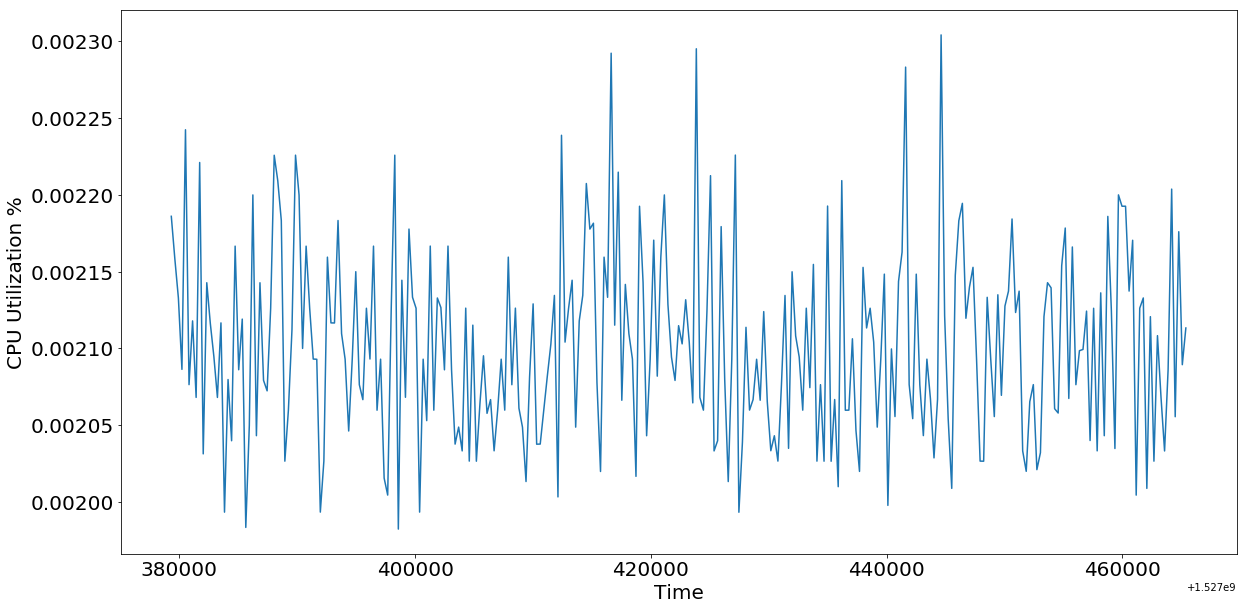

Task id scia-prod1-f335721a9c.scia---41e9bdd34308a6148a048d07ec163924b6c46695----78496f.78538ba0-603e-11e8-9273-2e60ad6fcb96


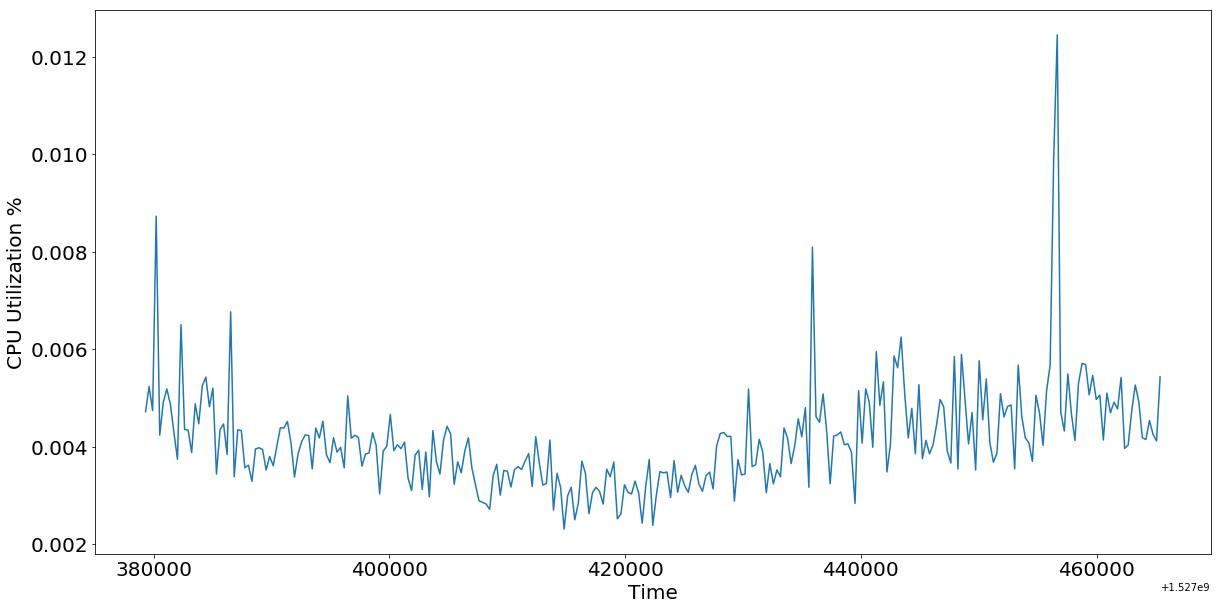

Task id tpia-prod-8f9d4ccb6a.tpia---cbca4d972516639a11f857428615e3f05a5dcf6f----cb9ddc.43d46f31-606c-11e8-9273-2e60ad6fcb96


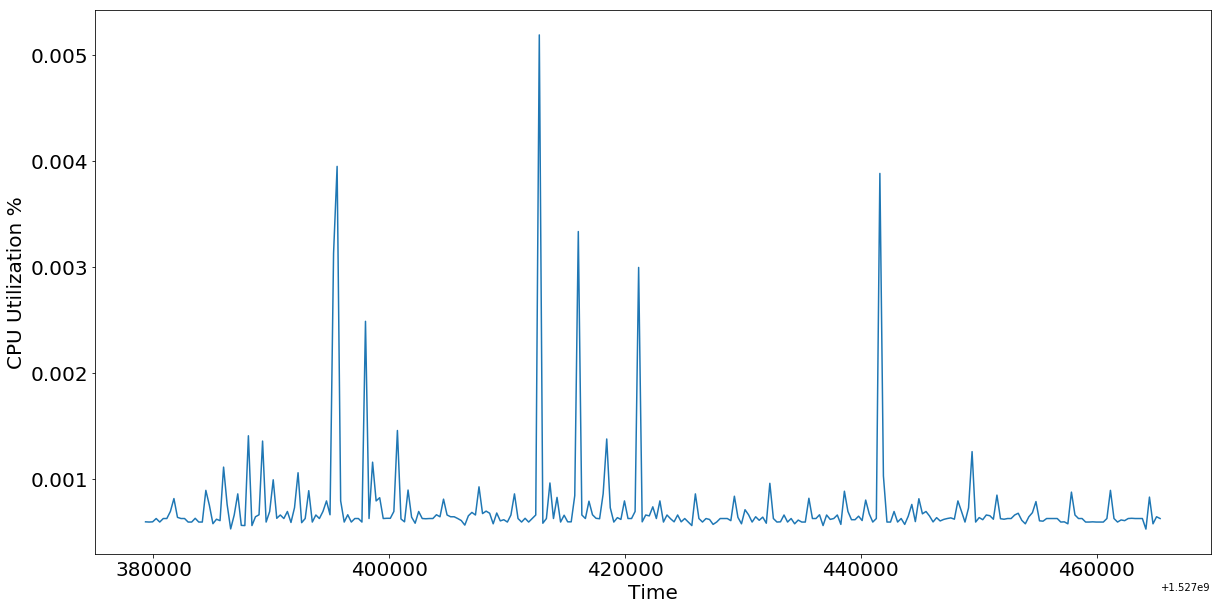

Task id scea-production-b909a18ba9.scea---7efea2c2f81885a18e34b77b8be64aea61965407----0f3e71.d81a870c-5e7d-11e8-9273-2e60ad6fcb96


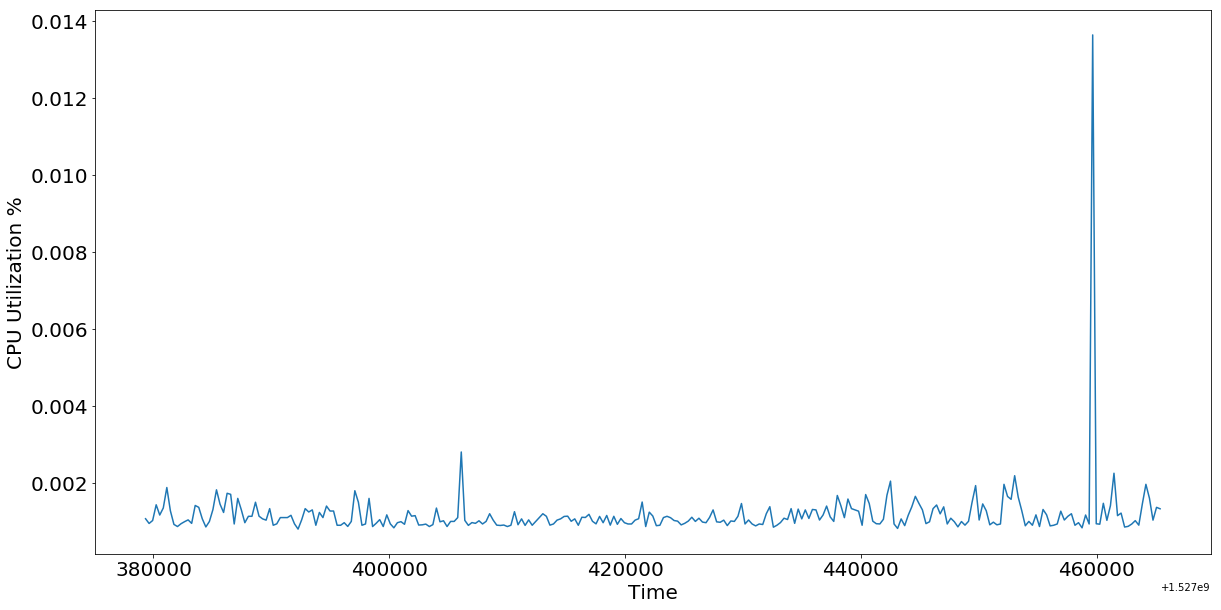

In [17]:
# plots of cpu utilisation of each task ids on that node

df2=pd.read_csv('NodeS48.csv')
task_ids=df2['mesos_task_id'].unique().tolist()

for c in task_ids: 
    x1=df2[df2['mesos_task_id']==c]

   
    x1=x1.sort_values('mesos_node_timestamp') # sort values based on node timestamp
    y=x1.groupby(['mesos_node_timestamp'],as_index=False)['mesos_task_total_cpu_time'].mean() # take mean of total cpu time if there are multiple values at same time 
    idx=[]
    idx.append(0)
    count=0
    # sample at 5 min interval
    for i in range(y.shape[0]):
        if y['mesos_node_timestamp'][i]-y['mesos_node_timestamp'][count]>=300.:
            idx.append(i)
            count=i
    z=y.iloc[idx,:]
    z['cpu_util']=z['mesos_task_total_cpu_time'].diff()/z['mesos_node_timestamp'].diff() # to find cpu util do this
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,10))
    plt.xlabel('Time',fontsize=20)
    plt.ylabel('CPU Utilization %',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
  
    plt.plot(z['mesos_node_timestamp'][1:],z['cpu_util'][1:]) # ignore the first value
    print('Task id',c)
    plt.show()
   

Node id: e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S48


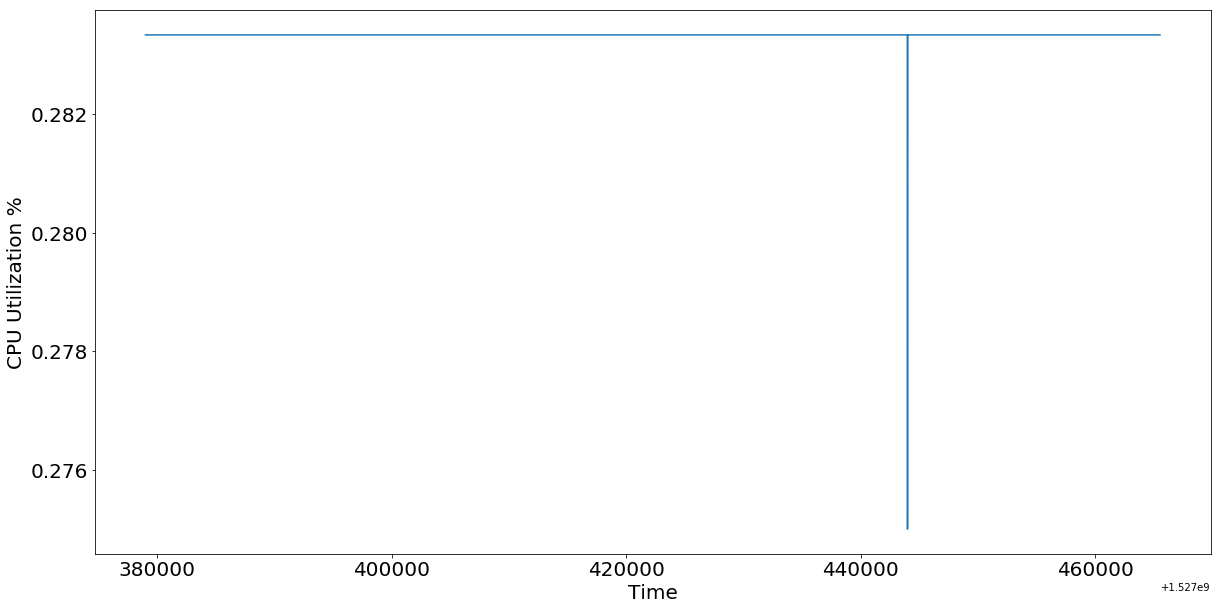

In [15]:
# plot of node cpu utilization

x1=df2

   
x1=x1.sort_values('mesos_node_timestamp')
y=x1.groupby(['mesos_node_timestamp'],as_index=False)['mesos_node_cpu_utilization'].mean()

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.xlabel('Time',fontsize=20)
plt.ylabel('CPU Utilization %',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(y['mesos_node_timestamp'],y['mesos_node_cpu_utilization'])
print('Node id:','e261a7c2-0df4-480e-b6d6-78ae6f9d6085-S48')
plt.show()


In [2]:
# smoothening function , uses hanning window
import numpy
def smooth(x,window_len=11,window='hanning'):
    if window_len<3:
           return x
    s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
    if window == 'flat': #moving average
           w=numpy.ones(window_len,'d')
    else:  
           w=eval('numpy.'+window+'(window_len)')
    y=numpy.convolve(w/w.sum(),s,mode='same')
    return y[window_len:-window_len+1]

In [4]:
# conversion of long plots(accross five days) to smooth plots for cpu util

import pandas as pd
df=pd.DataFrame(columns=['id','time','value'])
import tsfresh
import os

t_ids=[]
t_cpu_utils=[]
time=[]
for c in sorted(os.listdir('/home/ubuntu/plots_long')):
    print(c)
    t=pd.read_csv('/home/ubuntu/plots_long/'+c)

#     print(c)
    if c!='.ipynb_checkpoints':
        
      
        t['utilization'] = list(smooth(numpy.array(t['utilization']), 15))
        t.to_csv('./plots_smooth_long/'+c)

activitylogreceiver-prod-0bacf0ebf9.activitylogreceiver---51040c45e1a519ee176c8daa9e77ba6378a944e0----72b845.6b9a88cd-5e7e-11e8-9273-2e60ad6fcb96.csv
apex-production-eee88bd80a.apex---aefe9bffeb8365b6f4b47cc20c05e461923b4533----a1696b.aa710579-5fab-11e8-a63a-fe7cf23cbef0.csv
cclibraries-production-67331e1323.cclibraries---7a22d4f921336cd843b6909ac9681f5d6b5c93c8----0d9837.b00a1986-5f34-11e8-a9cd-ea97a4c792c6.csv
cupmat-production-632b434acd.cupmat---931670a3f56dd67ba46af758608cc03585b8c9f0----3c2f81.9cb3c26b-60ba-11e8-a239-421db0942d0d.csv
ddeventcnsumer-prod-2c92c18601.epcont---e9a3f6ca587854051425819a91474be758bf5ad1----a594f5.e6d4e9be-620d-11e8-a239-421db0942d0d.csv
enterorgservice-prod-6f99c19a45.enterorgservice---fc8848840b0bf301e00e071677a22b0b8e67aa29----2c8de7.f6d67e62-5f4e-11e8-a239-421db0942d0d.csv
ethoscanarytest2-prod-a32ce355c7.canarys---91b70c15c1ecc5378e0cb869199c0d59604a0e2f----4f061b.4f1aa5a8-6070-11e8-8d26-f61af398a948.csv
lridxsvc-production-94333b4209.lridx---207a8e

In [5]:
#conversion of long plots(accross five days) to smooth plots for memory util
import pandas as pd
df=pd.DataFrame(columns=['id','time','value'])
import tsfresh
import os

t_ids=[]
t_cpu_utils=[]
time=[]
for c in sorted(os.listdir('/home/ubuntu/plots_long_mem')):
    print(c)
    t=pd.read_csv('/home/ubuntu/plots_long_mem/'+c)

#     print(c)
    if c!='.ipynb_checkpoints':
        
      
        t['mem_util'] = list(smooth(numpy.array(t['mem_util']), 15))
        t.to_csv('./plots_smooth_long_mem/'+c)

activitylogreceiver-prod-0bacf0ebf9.activitylogreceiver---51040c45e1a519ee176c8daa9e77ba6378a944e0----72b845.6b9a88cd-5e7e-11e8-9273-2e60ad6fcb96.csv
apex-production-eee88bd80a.apex---aefe9bffeb8365b6f4b47cc20c05e461923b4533----a1696b.aa710579-5fab-11e8-a63a-fe7cf23cbef0.csv
cclibraries-production-67331e1323.cclibraries---7a22d4f921336cd843b6909ac9681f5d6b5c93c8----0d9837.b00a1986-5f34-11e8-a9cd-ea97a4c792c6.csv
cupmat-production-632b434acd.cupmat---931670a3f56dd67ba46af758608cc03585b8c9f0----3c2f81.9cb3c26b-60ba-11e8-a239-421db0942d0d.csv
ddeventcnsumer-prod-2c92c18601.epcont---e9a3f6ca587854051425819a91474be758bf5ad1----a594f5.e6d4e9be-620d-11e8-a239-421db0942d0d.csv
enterorgservice-prod-6f99c19a45.enterorgservice---fc8848840b0bf301e00e071677a22b0b8e67aa29----2c8de7.f6d67e62-5f4e-11e8-a239-421db0942d0d.csv
ethoscanarytest2-prod-a32ce355c7.canarys---91b70c15c1ecc5378e0cb869199c0d59604a0e2f----4f061b.4f1aa5a8-6070-11e8-8d26-f61af398a948.csv
lridxsvc-production-94333b4209.lridx---207a8e

activitylogreceiver-prod-0bacf0ebf9.activitylogreceiver---51040c45e1a519ee176c8daa9e77ba6378a944e0----72b845.6b9a88cd-5e7e-11e8-9273-2e60ad6fcb96.csv


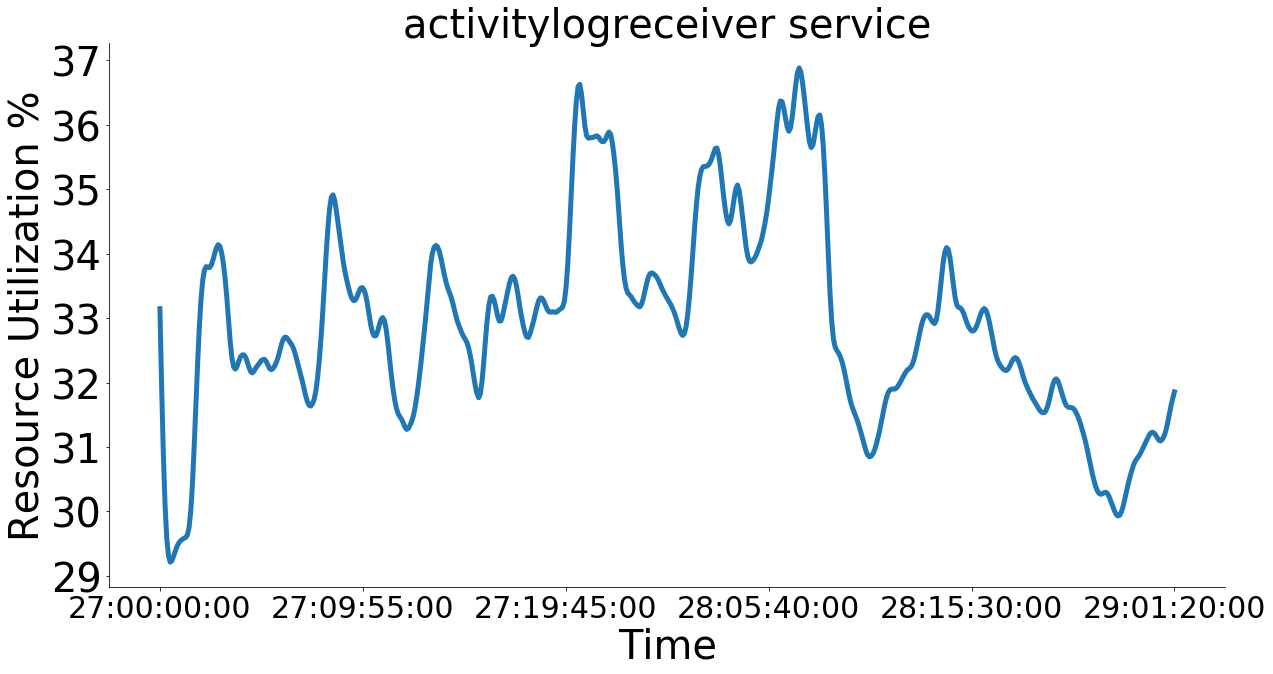

apex-production-eee88bd80a.apex---aefe9bffeb8365b6f4b47cc20c05e461923b4533----a1696b.aa710579-5fab-11e8-a63a-fe7cf23cbef0.csv


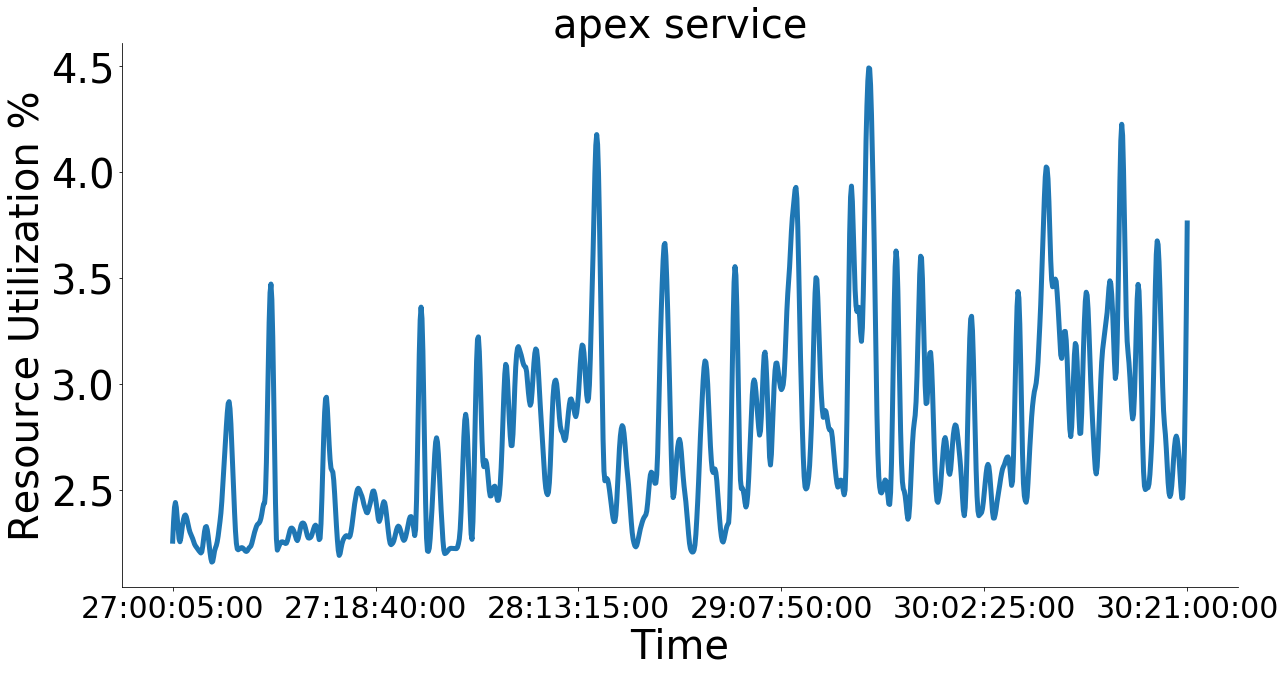

cclibraries-production-67331e1323.cclibraries---7a22d4f921336cd843b6909ac9681f5d6b5c93c8----0d9837.b00a1986-5f34-11e8-a9cd-ea97a4c792c6.csv


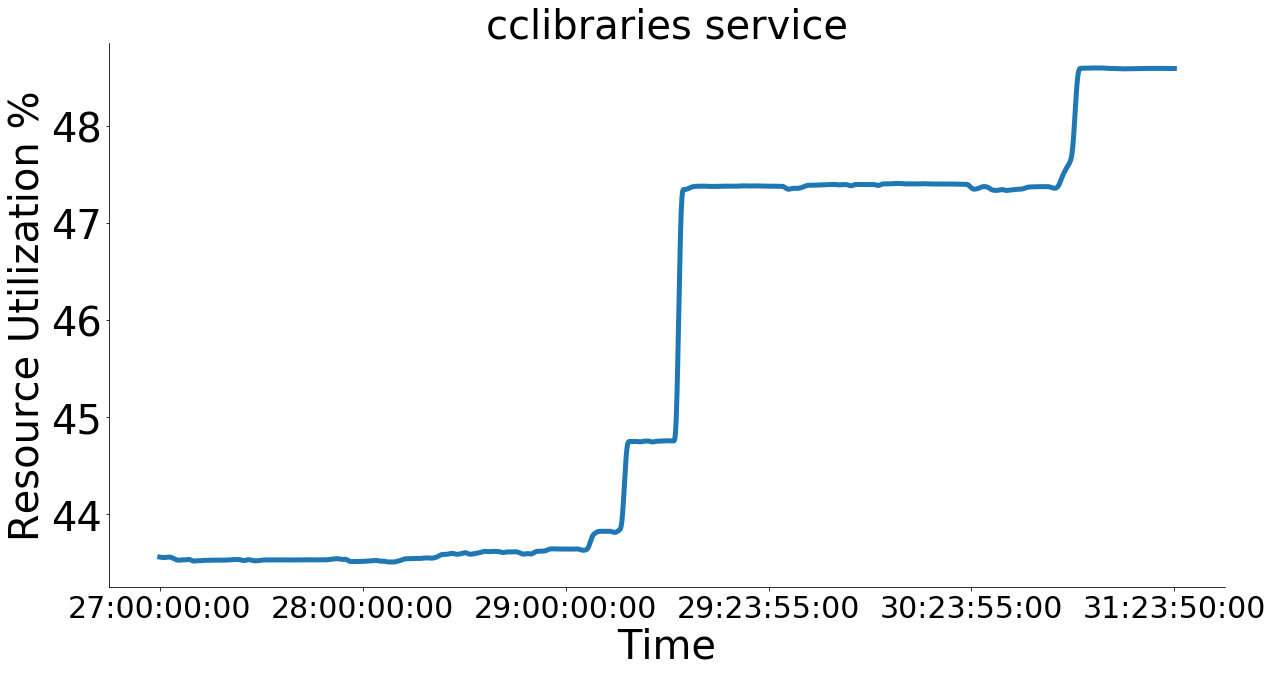

cupmat-production-632b434acd.cupmat---931670a3f56dd67ba46af758608cc03585b8c9f0----3c2f81.9cb3c26b-60ba-11e8-a239-421db0942d0d.csv


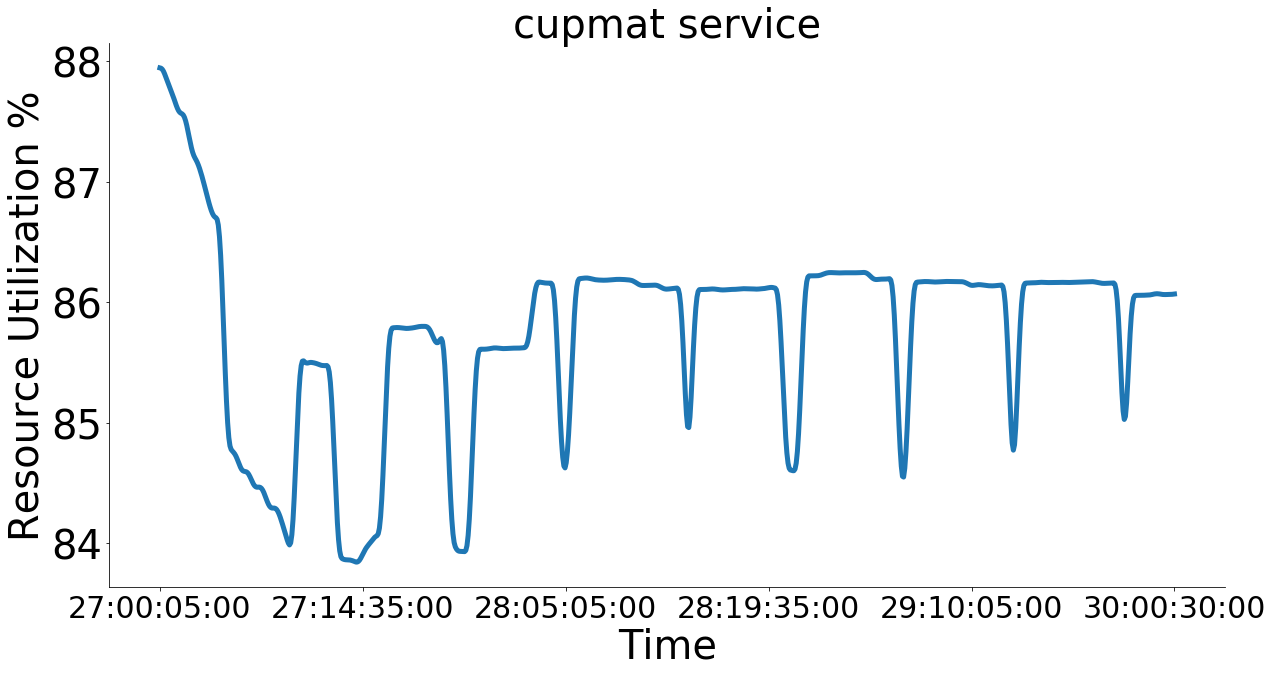

ddeventcnsumer-prod-2c92c18601.epcont---e9a3f6ca587854051425819a91474be758bf5ad1----a594f5.e6d4e9be-620d-11e8-a239-421db0942d0d.csv


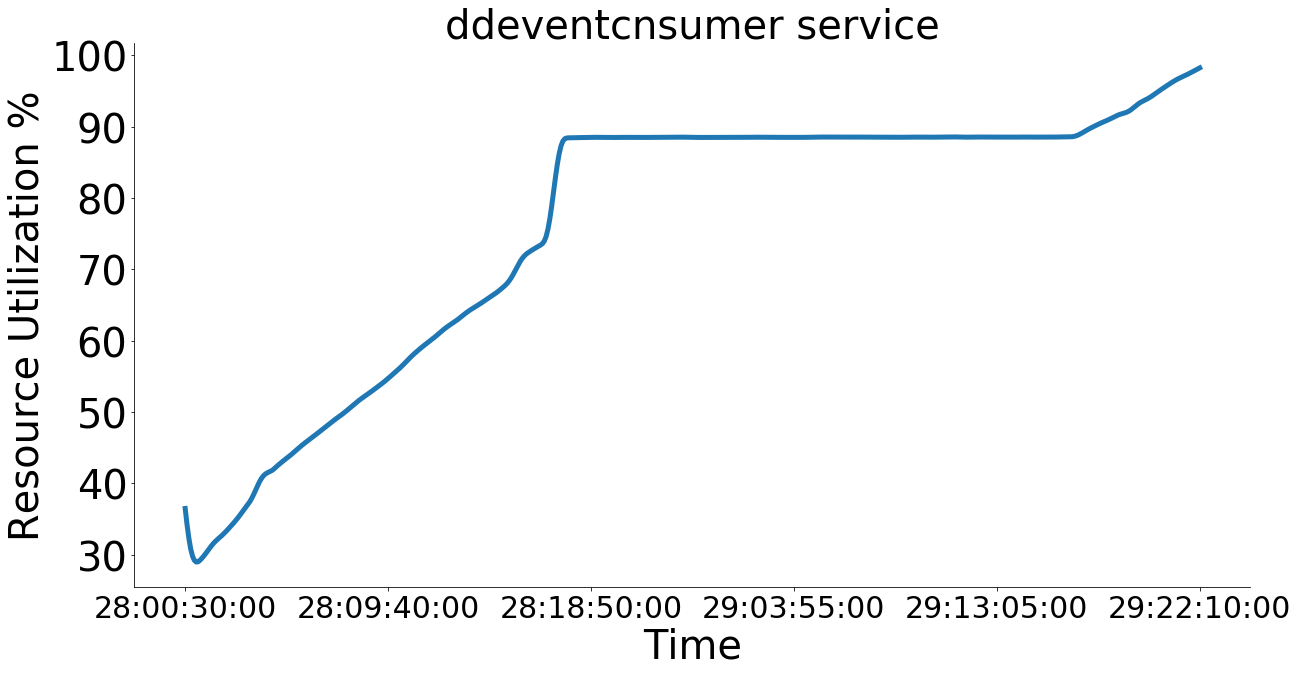

enterorgservice-prod-6f99c19a45.enterorgservice---fc8848840b0bf301e00e071677a22b0b8e67aa29----2c8de7.f6d67e62-5f4e-11e8-a239-421db0942d0d.csv


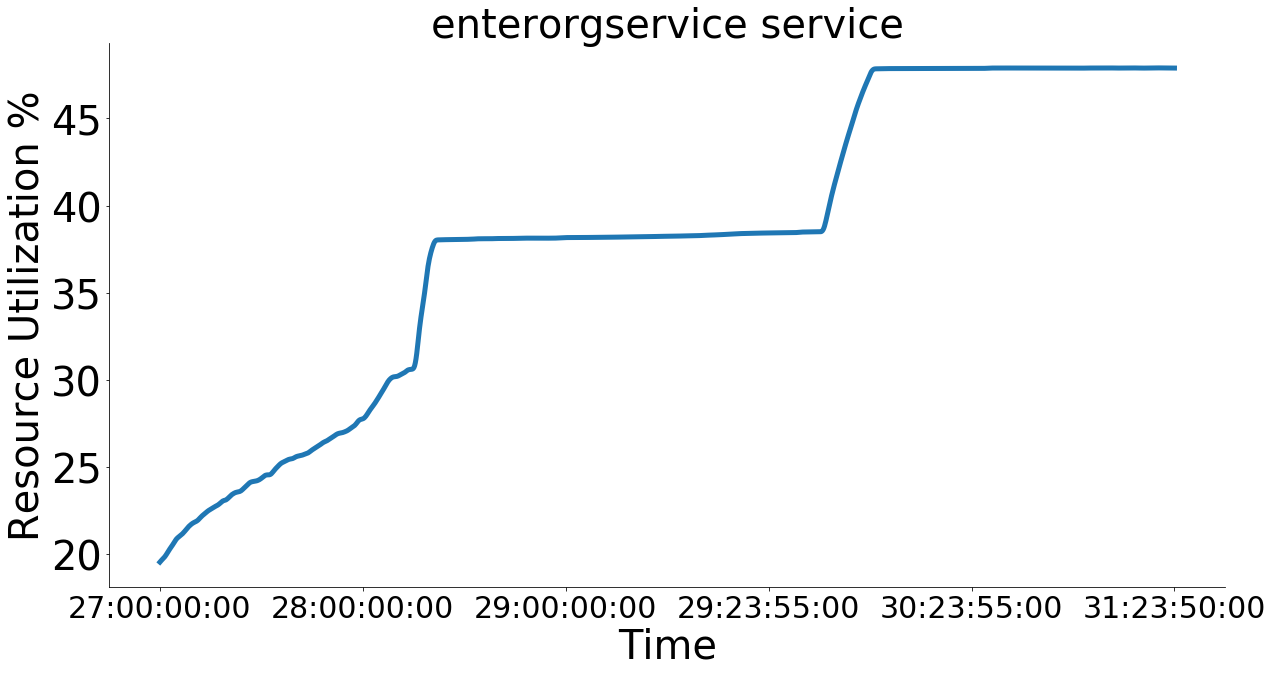

ethoscanarytest2-prod-a32ce355c7.canarys---91b70c15c1ecc5378e0cb869199c0d59604a0e2f----4f061b.4f1aa5a8-6070-11e8-8d26-f61af398a948.csv


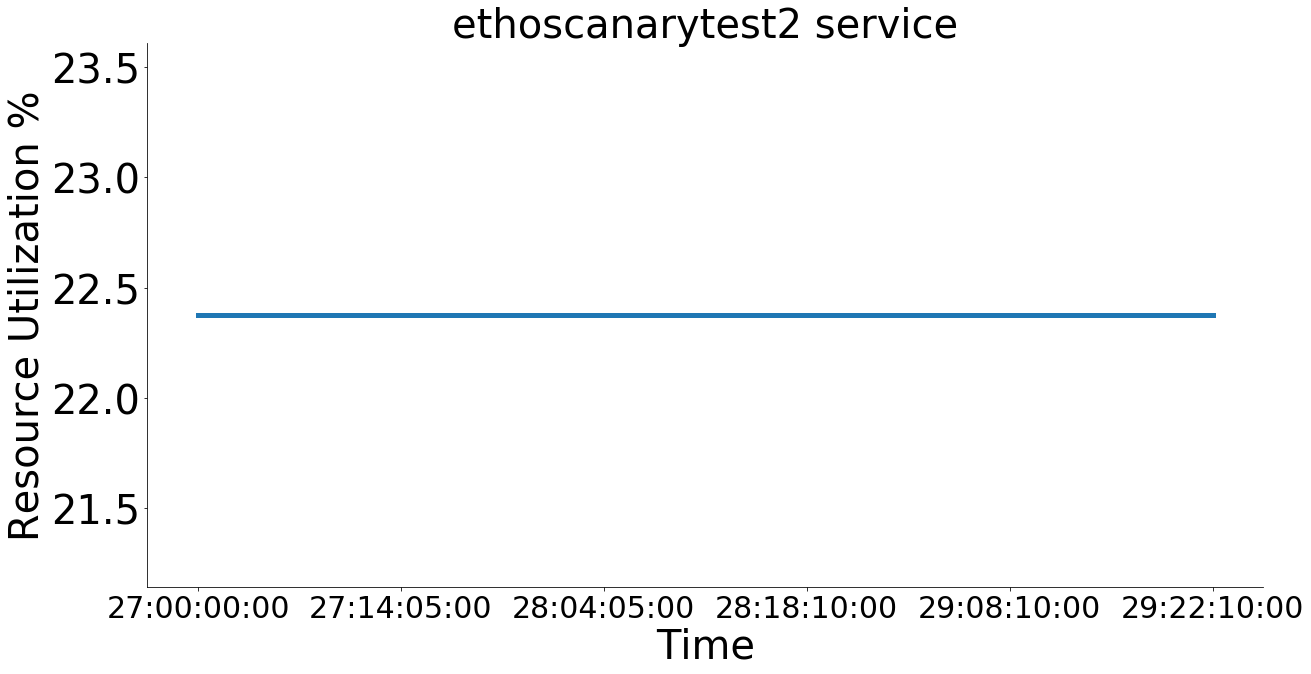

lridxsvc-production-94333b4209.lridx---207a8ec7f8378dd28d301c08e511a910e04da7ce----18c0d6.39f62255-5fa3-11e8-a239-421db0942d0d.csv


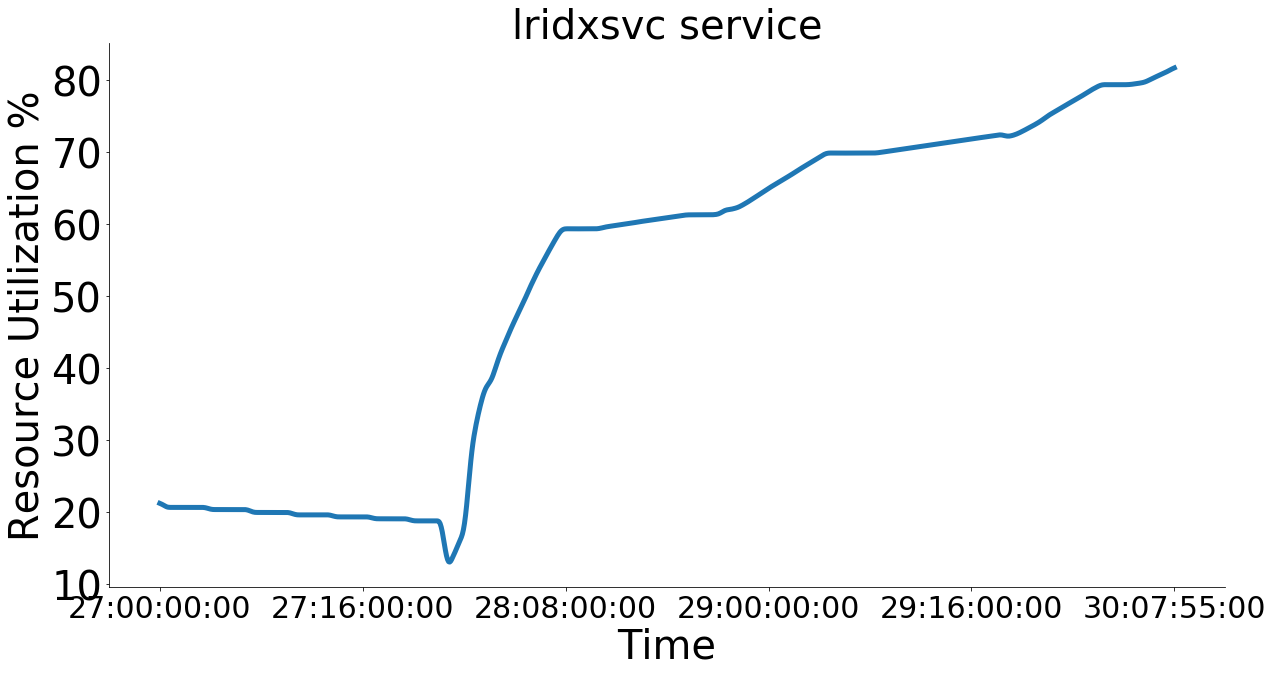

offers-prod-374f8f1744.offers---cb3b2578e23aaaff3a95c460b56468108f0228a9----138385.142ab1f5-6007-11e8-9920-b2e98c367baf.csv


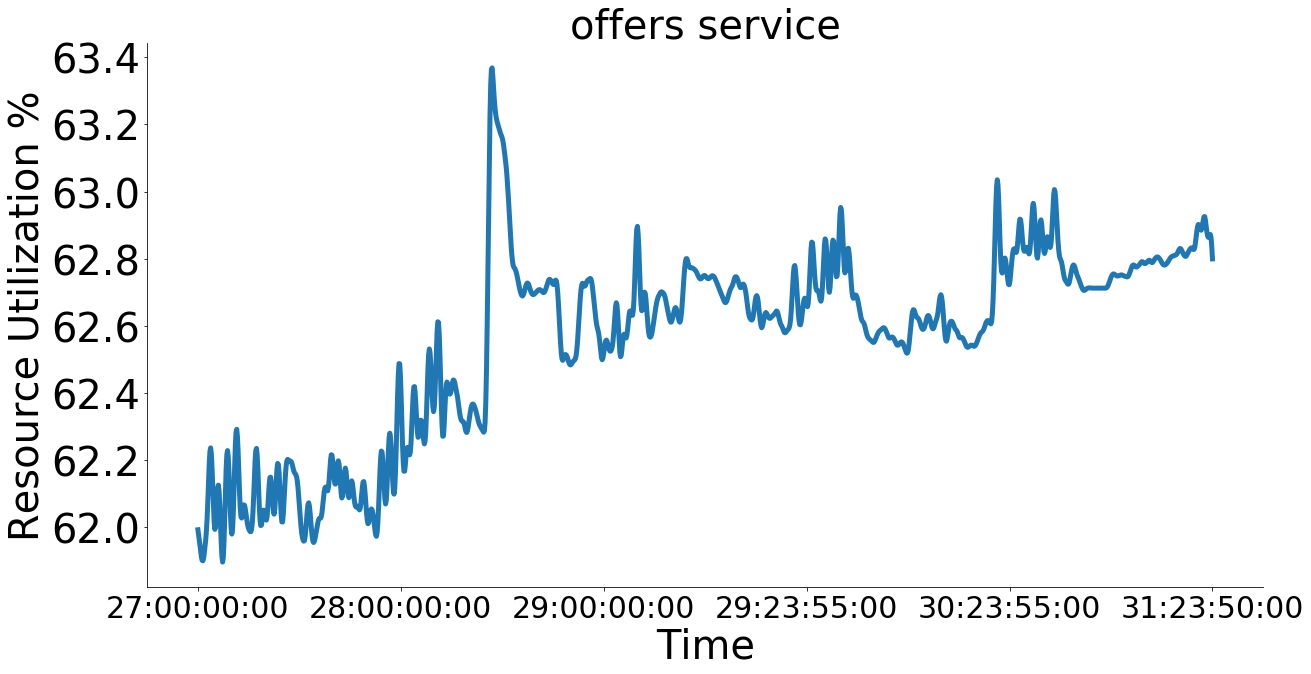

safereceiver-prod-6cf1ccb315.cont-1---9e16d406659a891dc50cfd6189216d26cf46e985----b2bfef.cf55a453-5e79-11e8-a239-421db0942d0d.csv


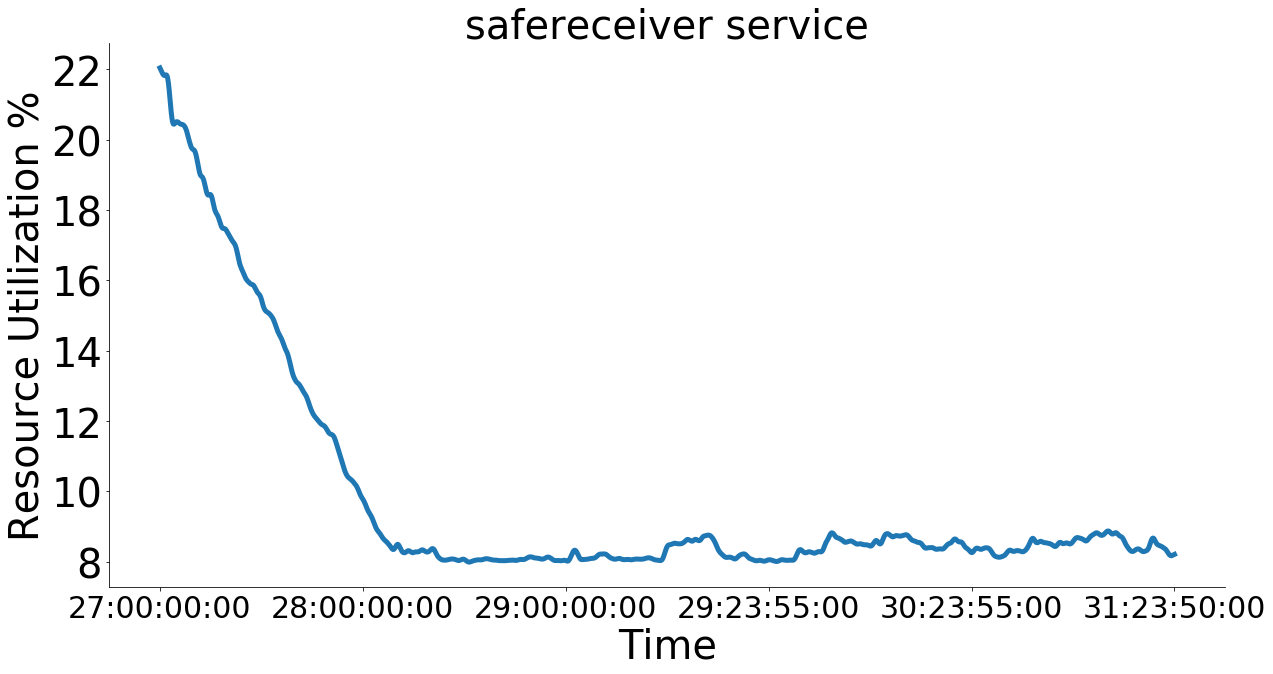

scidxsvc-production-36a1ff80c9.scidx---44f76356a831cc5b857e35363ca55b45bcb98a9c----44ed60.edbf821c-5fff-11e8-bcd1-8633960b35b2.csv


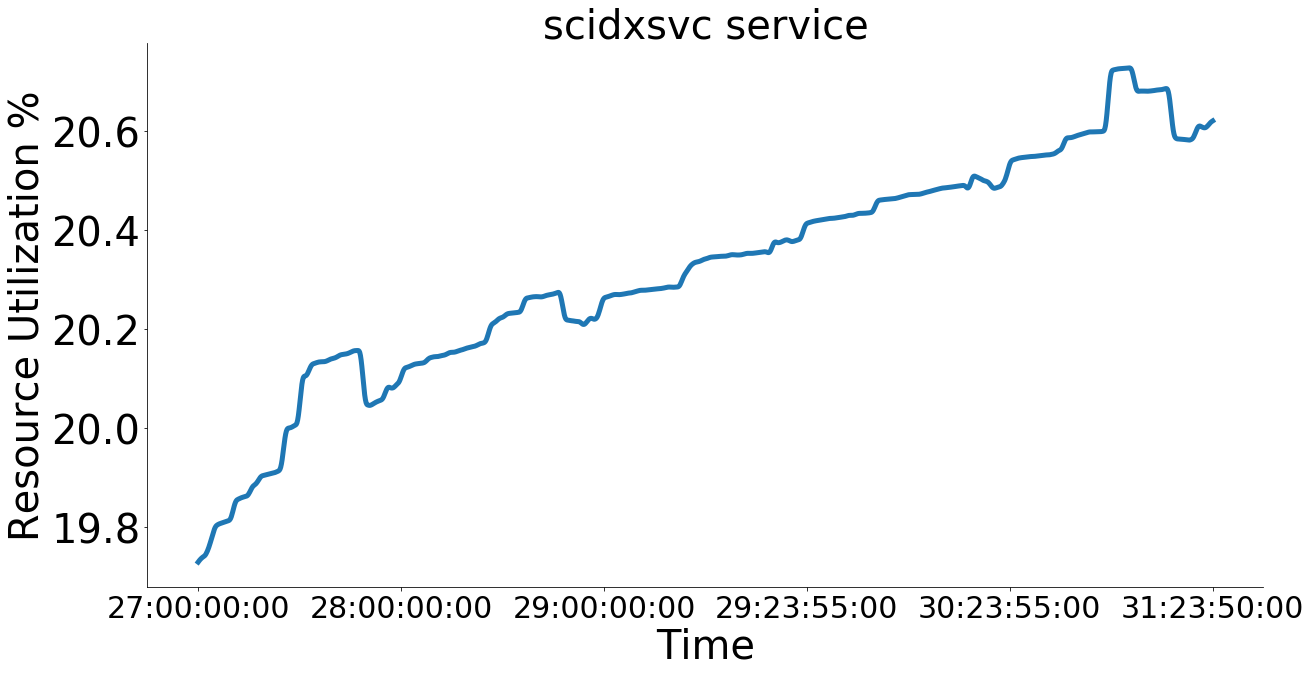

sellableitems-prod-fa8b019fbf.sis---2f7d392b9bc7dcd2d78f7de7a6ae249ec50a3a99----cf0e87.cf1c321f-6003-11e8-9920-b2e98c367baf.csv


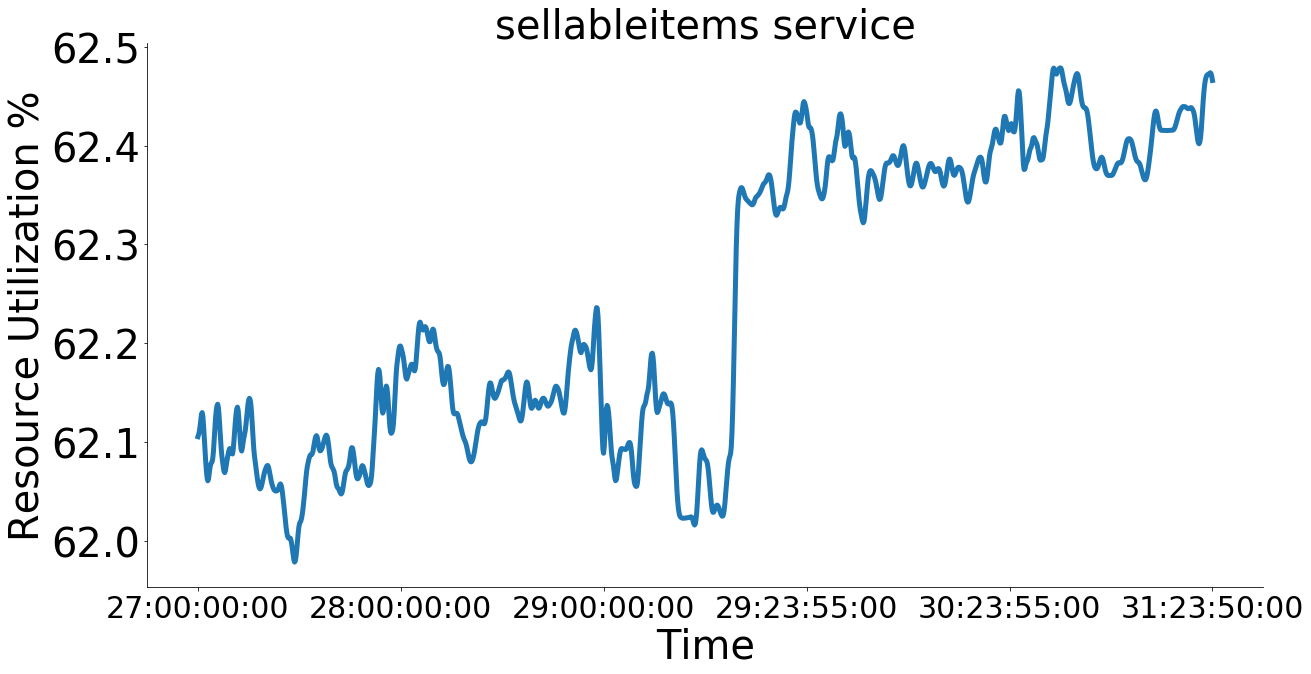

senseifeaturefacedescriptor-prod-e2f33acc40.container1---ba824b21a645594c9a3ffd7f6bb070796ae6606b----5fc626.6ed1662a-605a-11e8-a239-421db0942d0d.csv


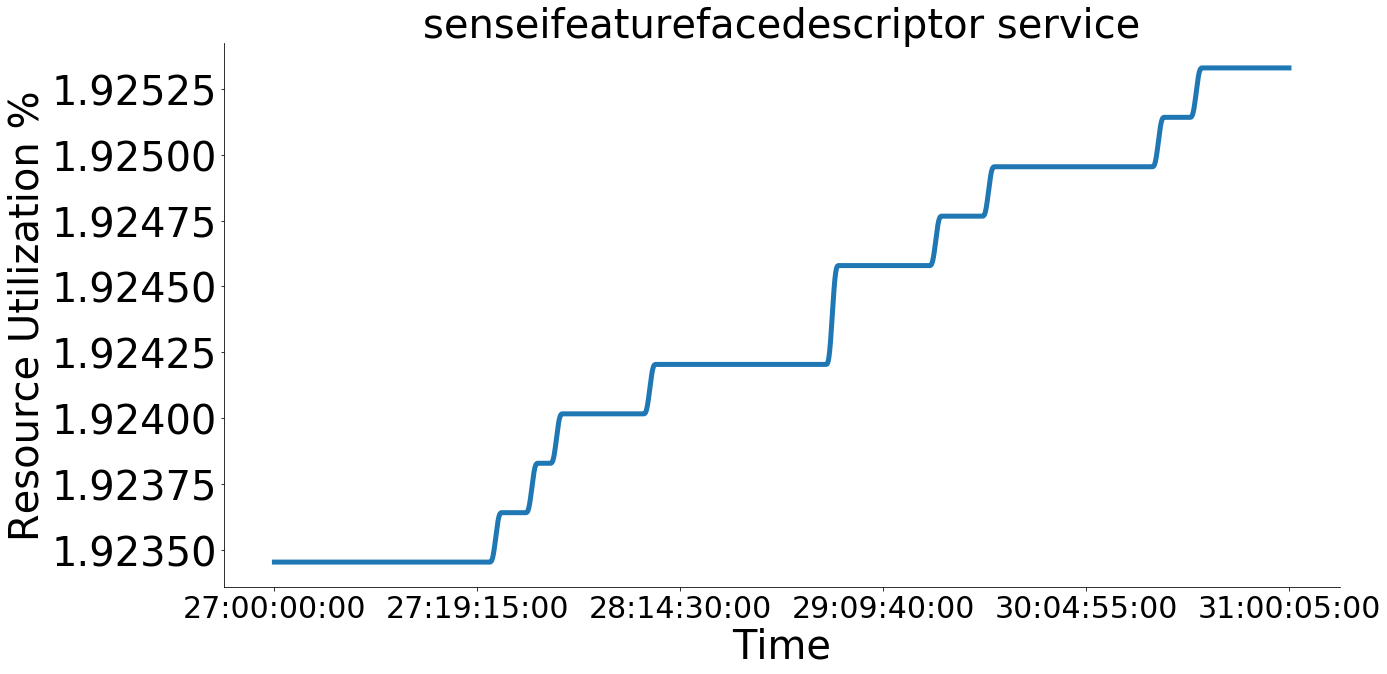

stkidxs-production-ab8617b0fc.idxsvc---7674e02e84c2224801630052b778740cc95f6255----669be1.9ac496e0-625f-11e8-bc2f-3a4f9d122ee5.csv


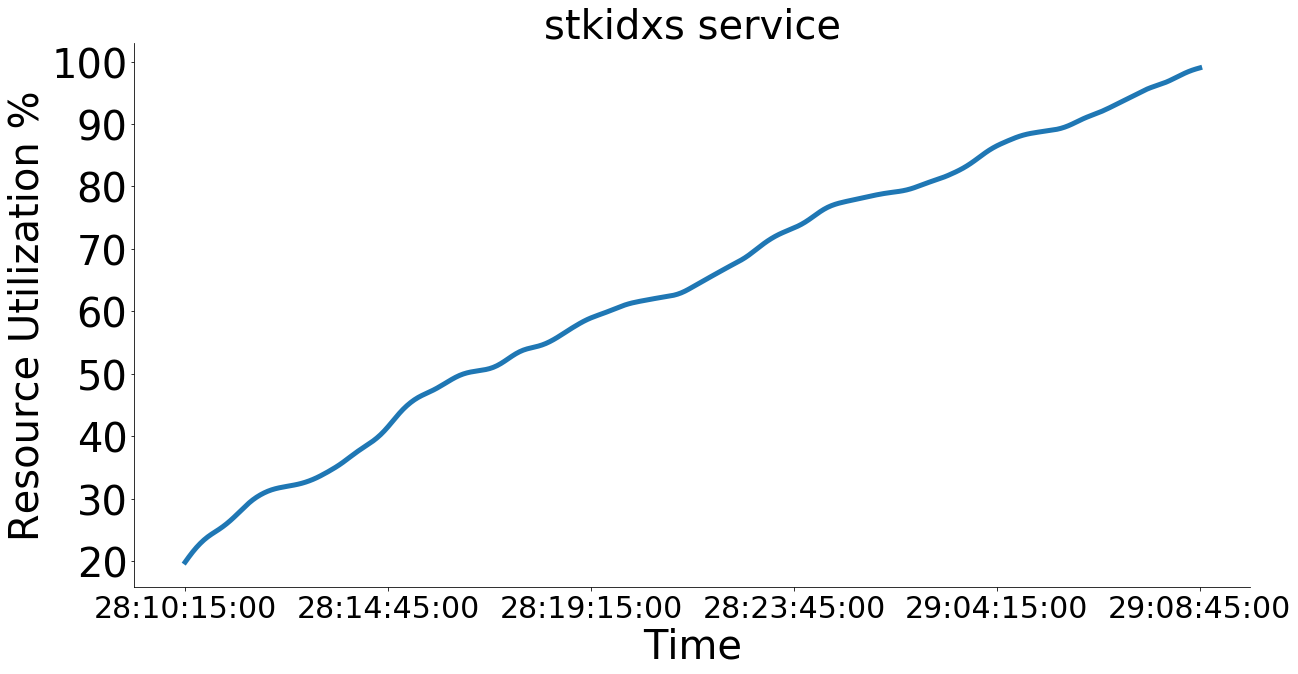

storybackupworker-production-75848d087d.storybackupworker---32b03c6bfe841b4d5d3c95858c1efc608f047092----0f7339.ae4bfa9d-5dec-11e8-8cc3-8230a943a1c1.csv


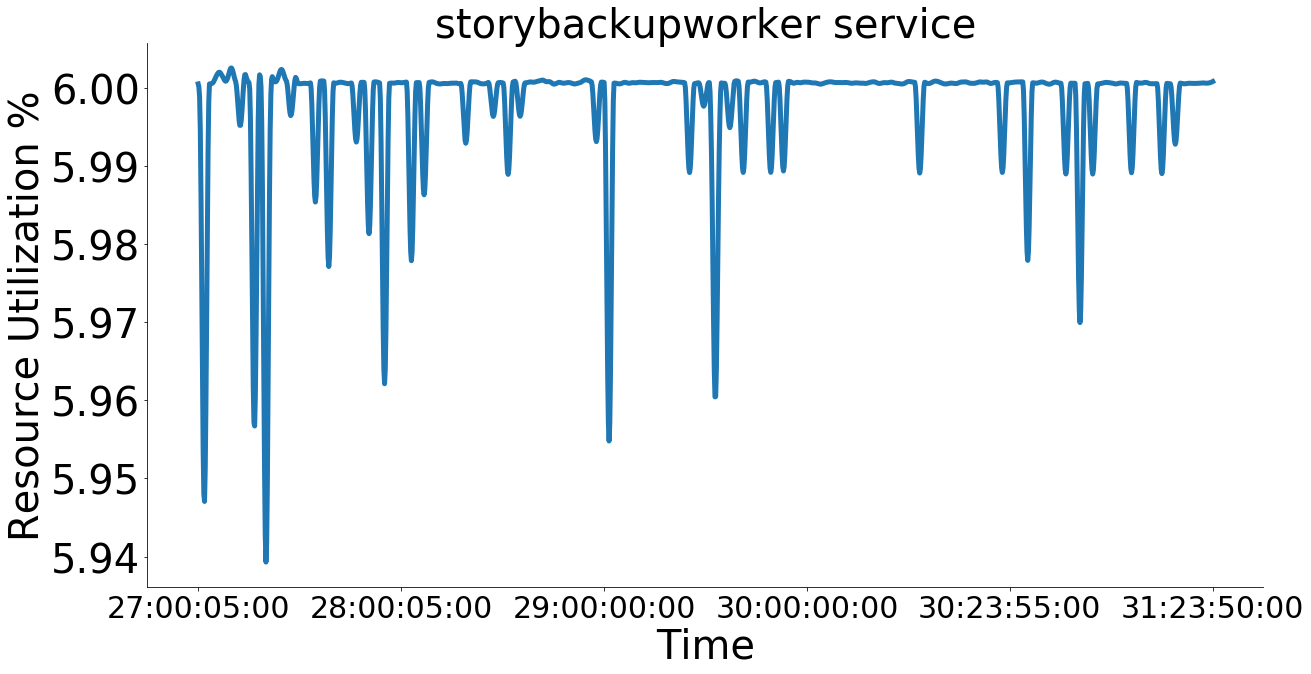

tps-prod-2d4e5b3fe2.tps---66893b06de7a86adcc1972ffa5bad5168ca15a6c----332e03.ec12717f-6028-11e8-a239-421db0942d0d.csv


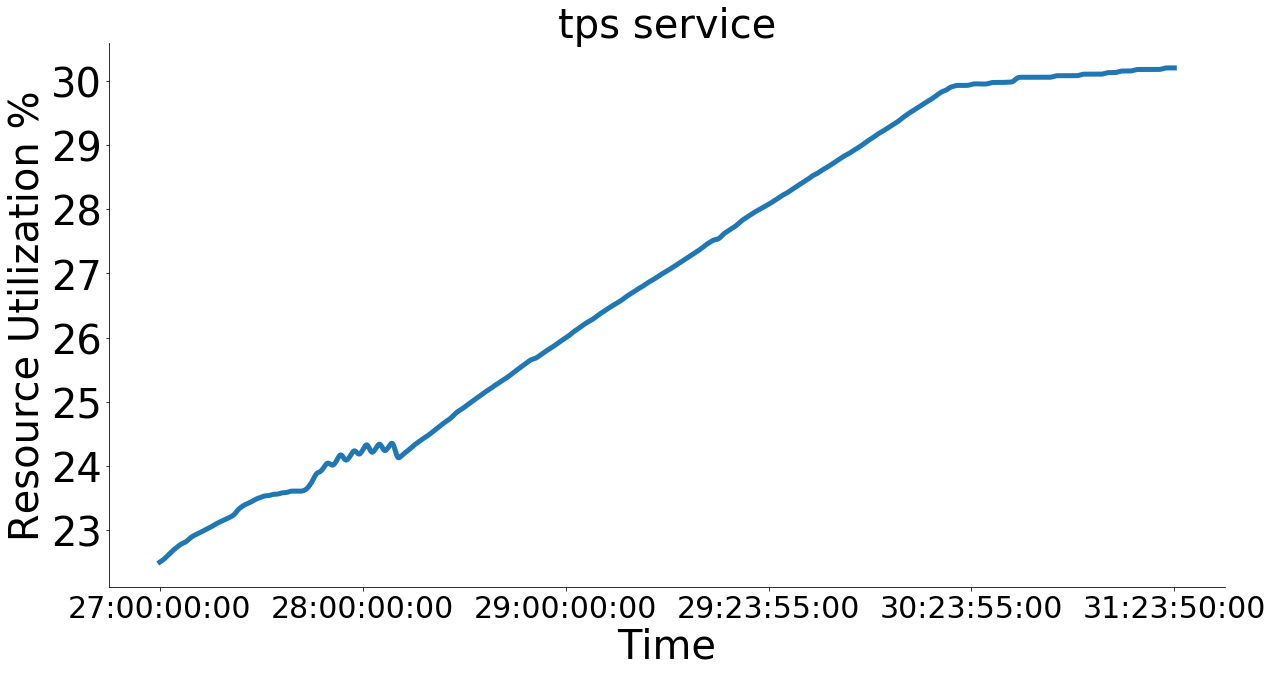

tslogger-prod-028e645d88.tslogger---18849bccfeaf3c135ceeed354e0096f0ba44625c----5ce564.f9f3de78-5e7a-11e8-a239-421db0942d0d.csv


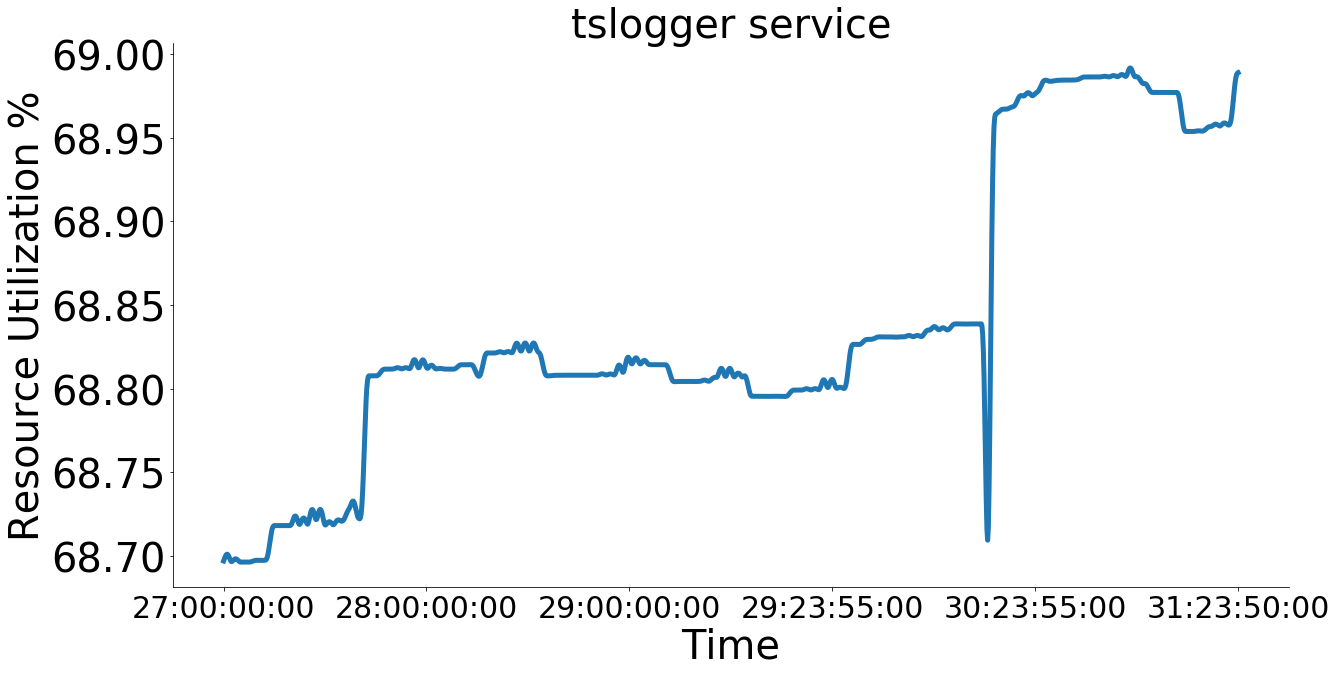

uss-prod-105178c1ac.uss---ba6c765721ca698182164c3cee9a8e474fe93de3----b997c2.b9a9878a-5f44-11e8-a9cd-ea97a4c792c6.csv


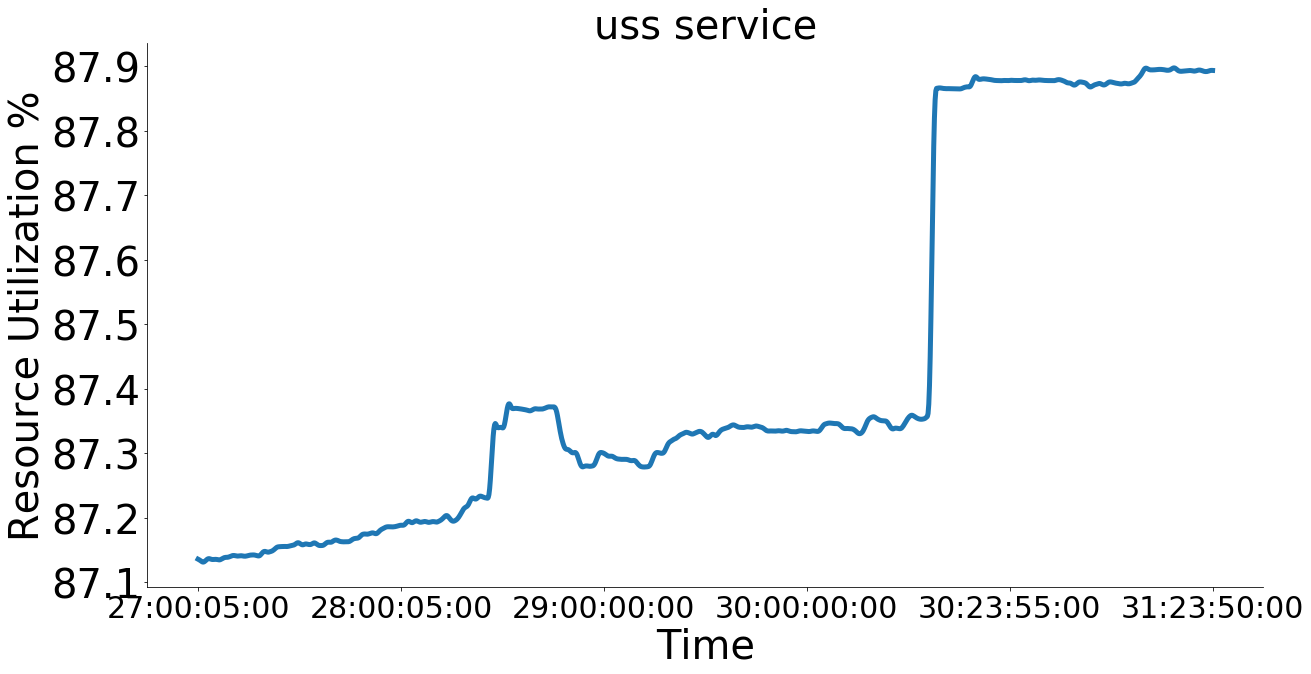

In [6]:
import  pandas as pd
import numpy as np
import os
for c in sorted(os.listdir('/home/ubuntu/plots_smooth_long_mem')):
    print(c)
    t=pd.read_csv('/home/ubuntu/plots_smooth_long_mem/'+c)
    import datetime
    x=[]
    for p in range(t.shape[0]):
    
    # convert unix timestamp to datetime format
        x.append(datetime.datetime.fromtimestamp(
            t['node_timestamp'][p]
        ).strftime('%Y-%m-%d %H:%M:%S'))
    
    t['date']=x
    # extract hour and day from datetime format
    t['hour'] =  pd.to_datetime(t['date'], format='%Y%m%d %H:%M:%S.%f').dt.hour
    t['day'] =  pd.to_datetime(t['date'], format='%Y%m%d %H:%M:%S.%f').dt.day
    
    
    xi=[]
    for m in range(t.shape[0]):
        xi.append(str(t['day'][m])+':'+t['date'][m][-8:])
    t['day_hour']=xi # day_hour_min_secs format
    %matplotlib inline
  
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,10))
   
    ax = plt.subplot()


# Hide the right and top axis
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
   

   
    
    ax.plot(t['node_timestamp'],t['mem_util'],linewidth=5)
    
    plt.xticks(np.arange(t['node_timestamp'].min(),t['node_timestamp'].max()+1,(t['node_timestamp'].max()-t['node_timestamp'].min())/5))
    idx=[]
    y=np.arange(t['node_timestamp'].min(),t['node_timestamp'].max()+1,(t['node_timestamp'].max()-t['node_timestamp'].min())/5)
    for l in list(y):
    
        idx.append(t.index[t['node_timestamp'] >=int(l)].tolist()[0])
    plt.xticks(list(np.arange(t['node_timestamp'].min(),t['node_timestamp'].max()+1,(t['node_timestamp'].max()-t['node_timestamp'].min())/5)),
                    t['day_hour'][idx].values.tolist())  # Set locations and labels
    plt.title(c.split('-')[0]+' service',fontsize=40)
    plt.xlabel('Time',fontsize=40)
    plt.ylabel('Resource Utilization %',fontsize=40)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=40)
  

    plt.show()
    

activitylogreceiver-prod-0bacf0ebf9.activitylogreceiver---51040c45e1a519ee176c8daa9e77ba6378a944e0----72b845.6b9a88cd-5e7e-11e8-9273-2e60ad6fcb96.csv


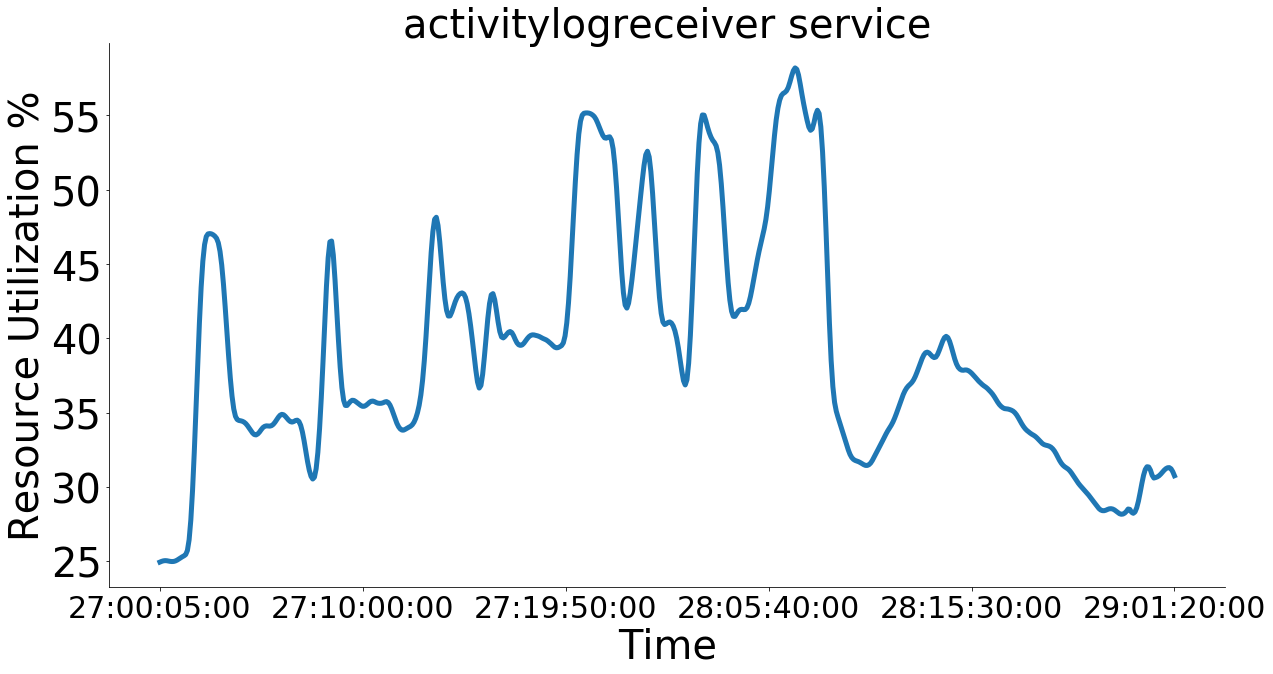

apex-production-eee88bd80a.apex---aefe9bffeb8365b6f4b47cc20c05e461923b4533----a1696b.aa710579-5fab-11e8-a63a-fe7cf23cbef0.csv


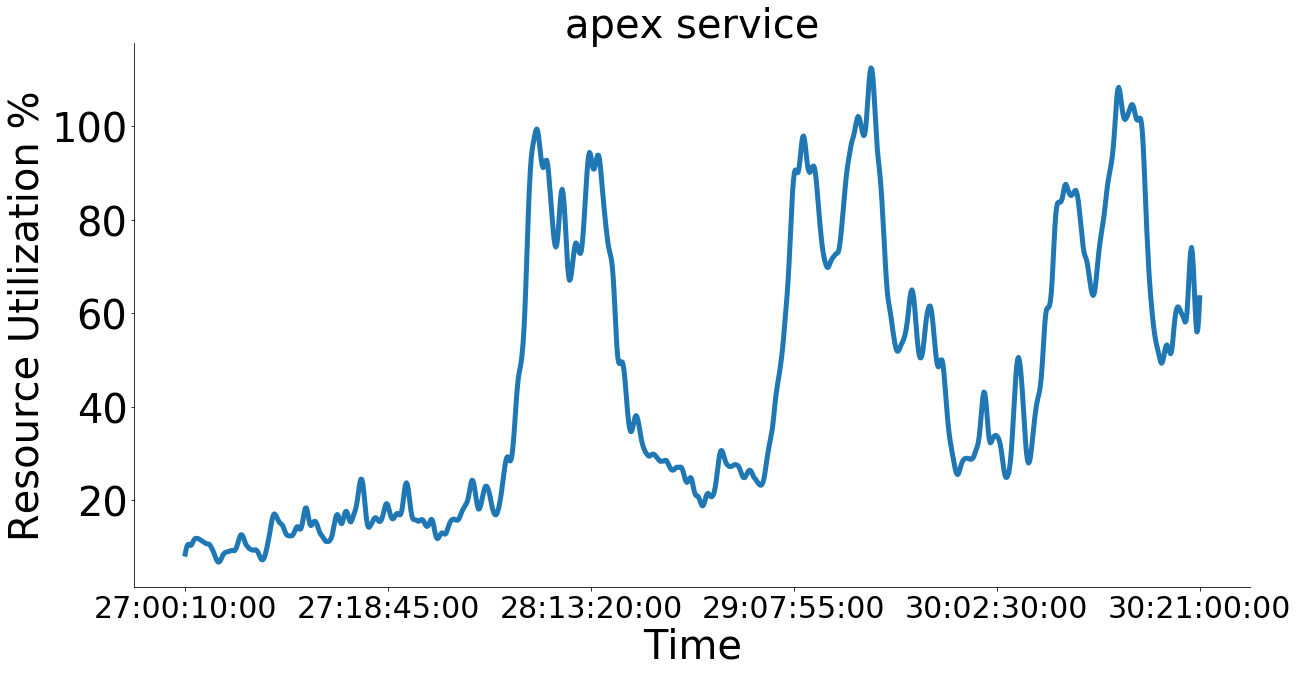

cclibraries-production-67331e1323.cclibraries---7a22d4f921336cd843b6909ac9681f5d6b5c93c8----0d9837.b00a1986-5f34-11e8-a9cd-ea97a4c792c6.csv


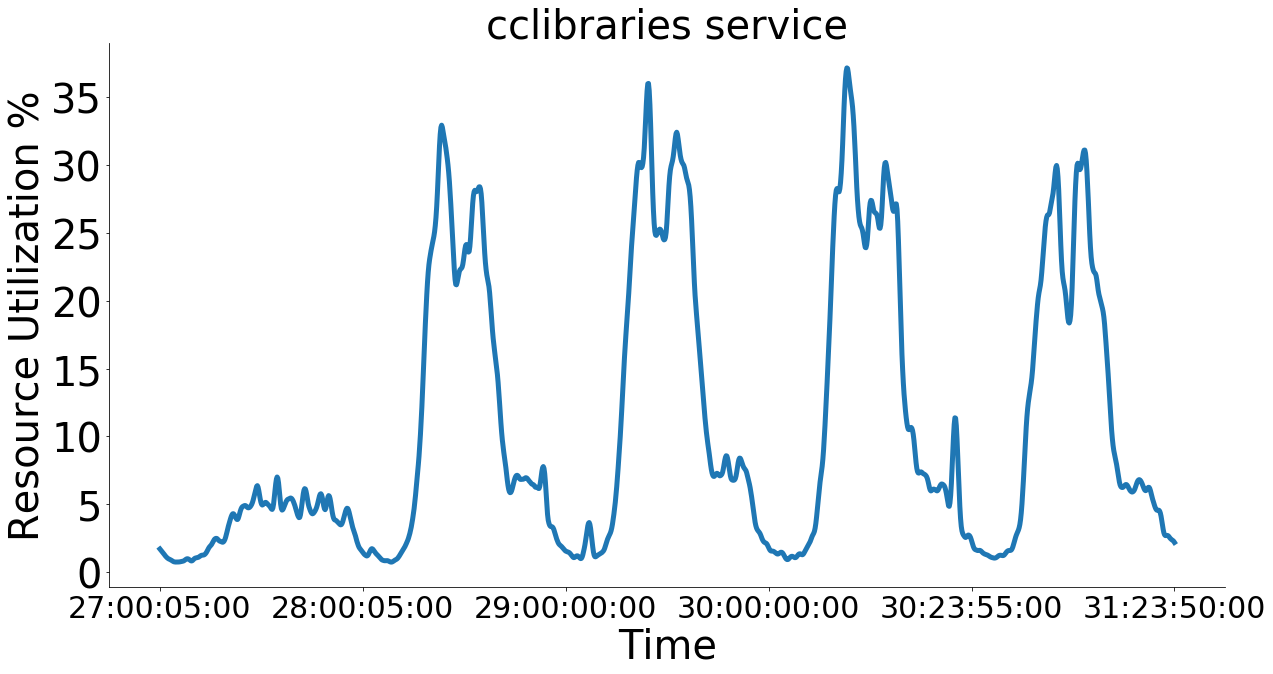

cupmat-production-632b434acd.cupmat---931670a3f56dd67ba46af758608cc03585b8c9f0----3c2f81.9cb3c26b-60ba-11e8-a239-421db0942d0d.csv


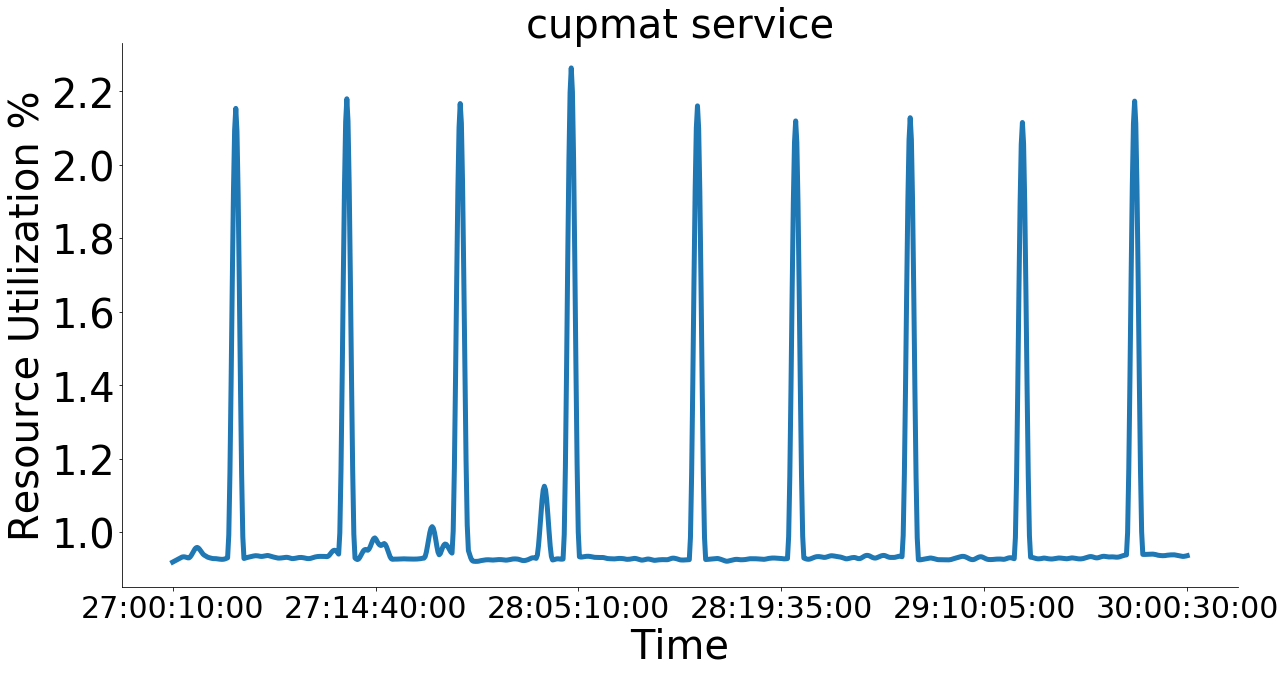

ddeventcnsumer-prod-2c92c18601.epcont---e9a3f6ca587854051425819a91474be758bf5ad1----a594f5.e6d4e9be-620d-11e8-a239-421db0942d0d.csv


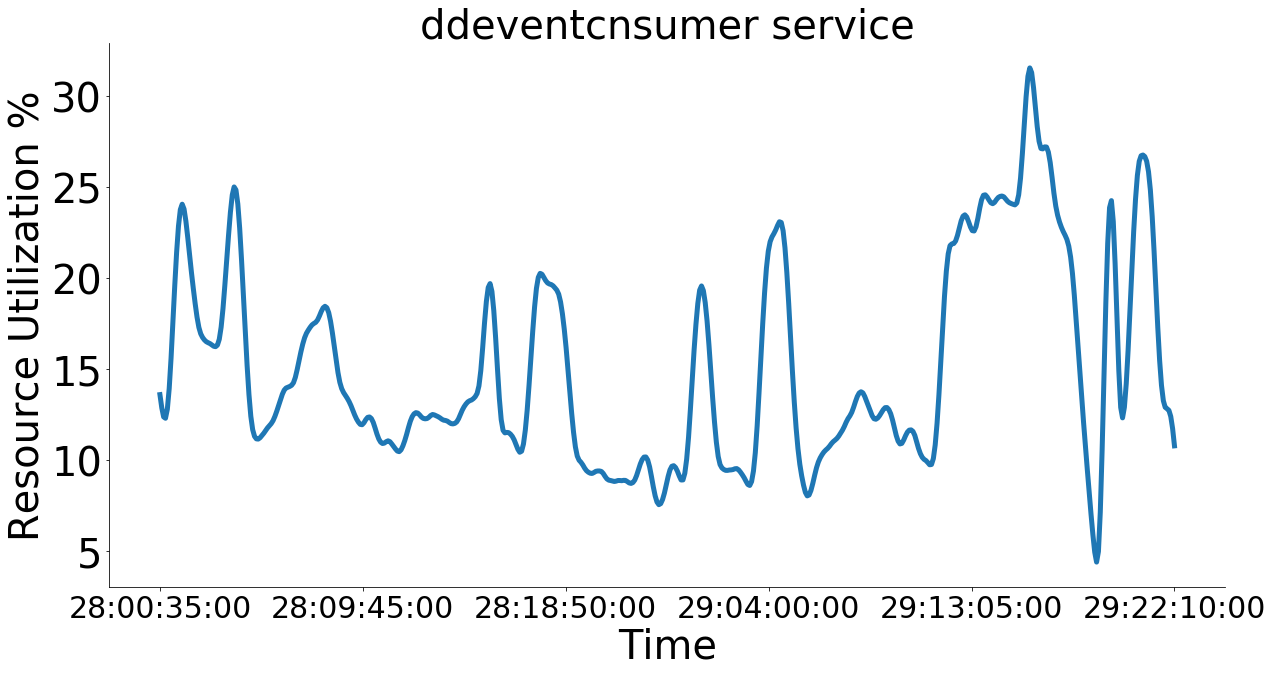

enterorgservice-prod-6f99c19a45.enterorgservice---fc8848840b0bf301e00e071677a22b0b8e67aa29----2c8de7.f6d67e62-5f4e-11e8-a239-421db0942d0d.csv


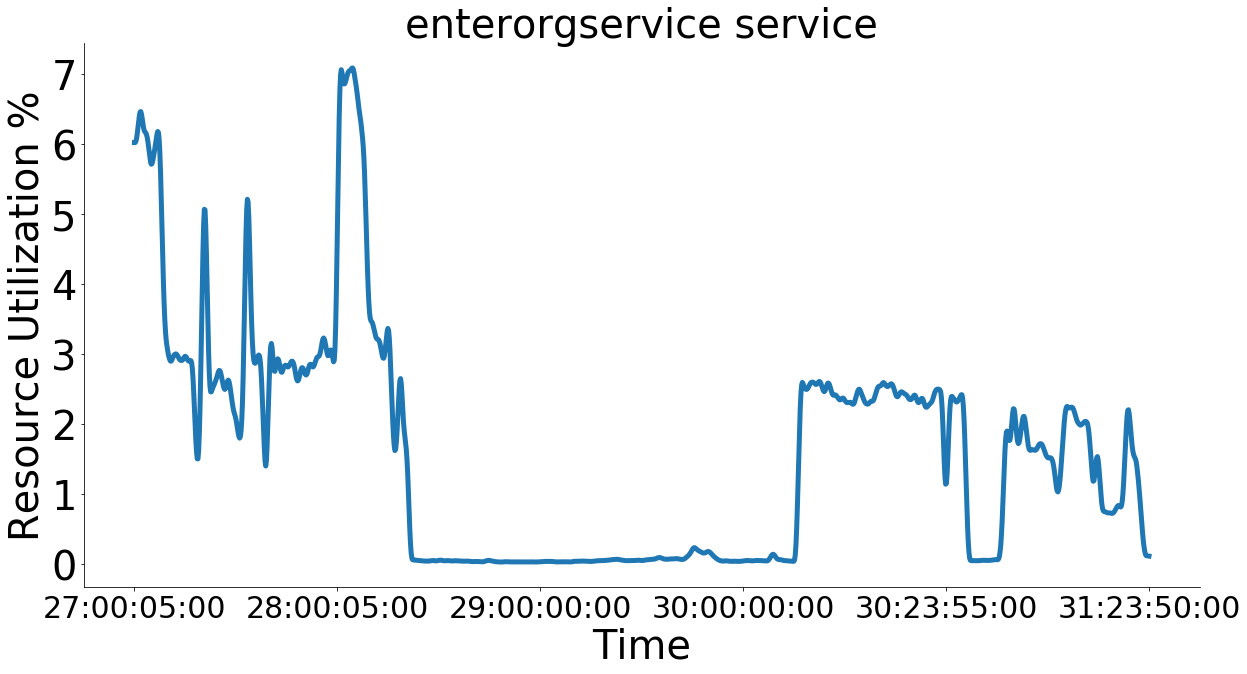

ethoscanarytest2-prod-a32ce355c7.canarys---91b70c15c1ecc5378e0cb869199c0d59604a0e2f----4f061b.4f1aa5a8-6070-11e8-8d26-f61af398a948.csv


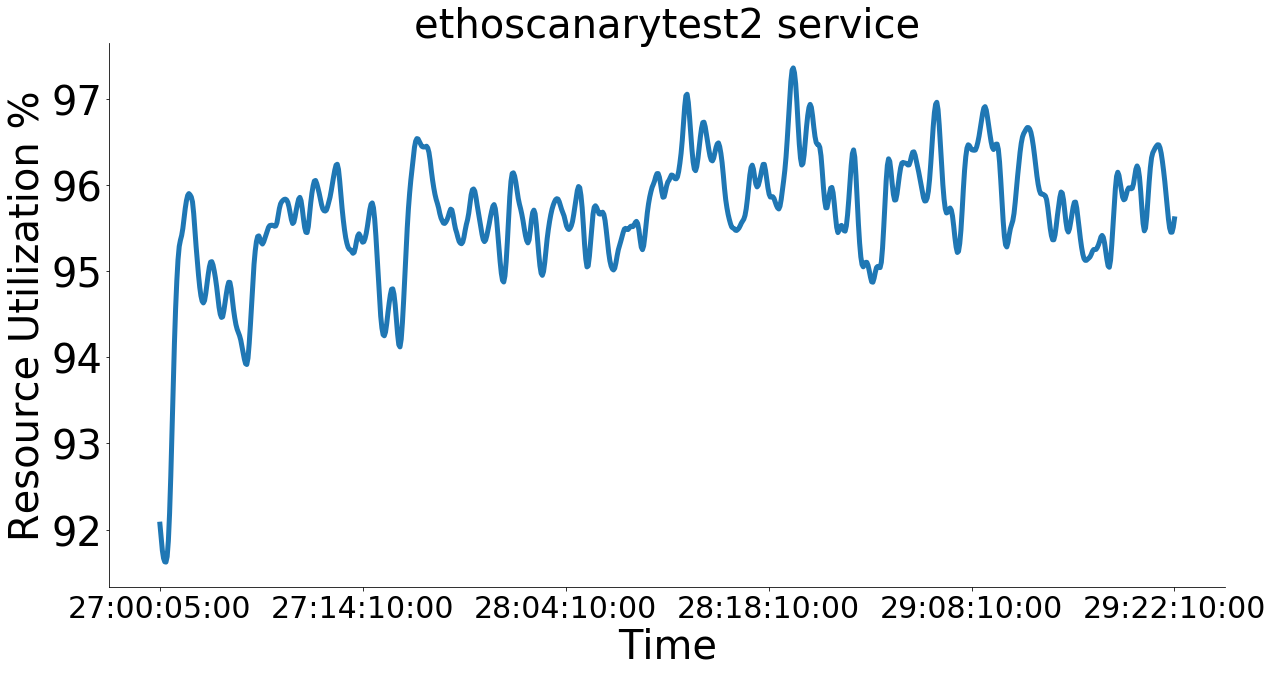

lridxsvc-production-94333b4209.lridx---207a8ec7f8378dd28d301c08e511a910e04da7ce----18c0d6.39f62255-5fa3-11e8-a239-421db0942d0d.csv


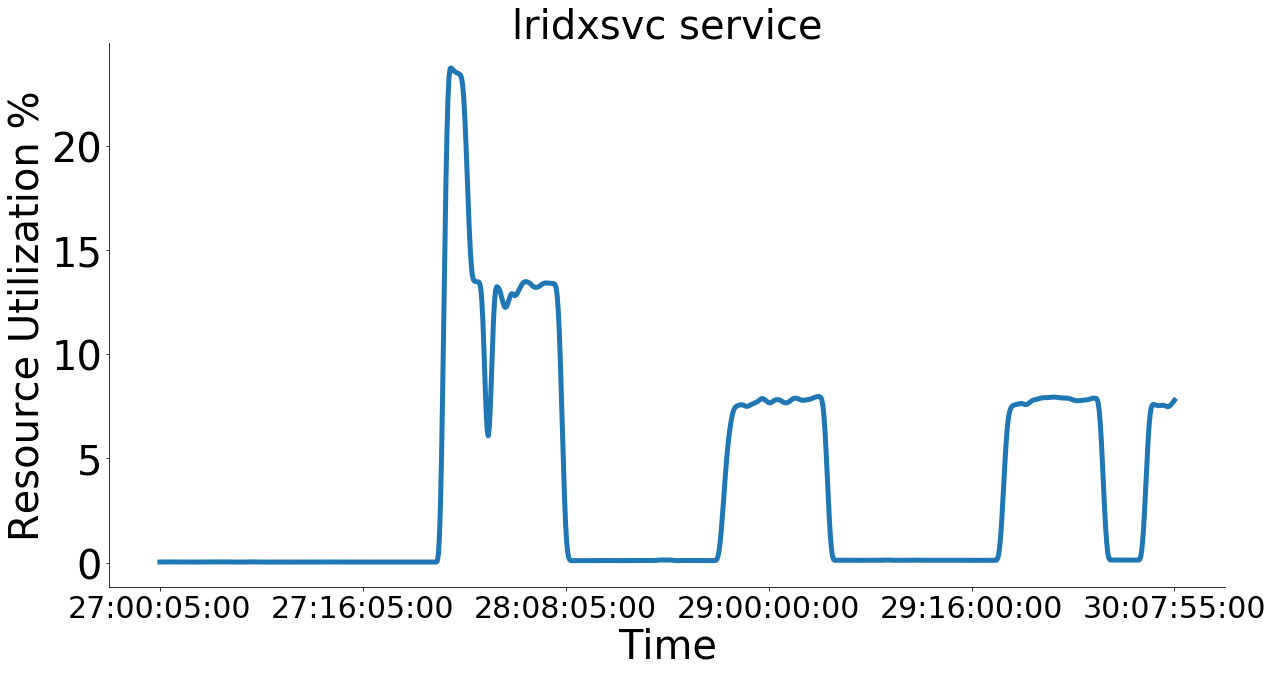

offers-prod-374f8f1744.offers---cb3b2578e23aaaff3a95c460b56468108f0228a9----138385.142ab1f5-6007-11e8-9920-b2e98c367baf.csv


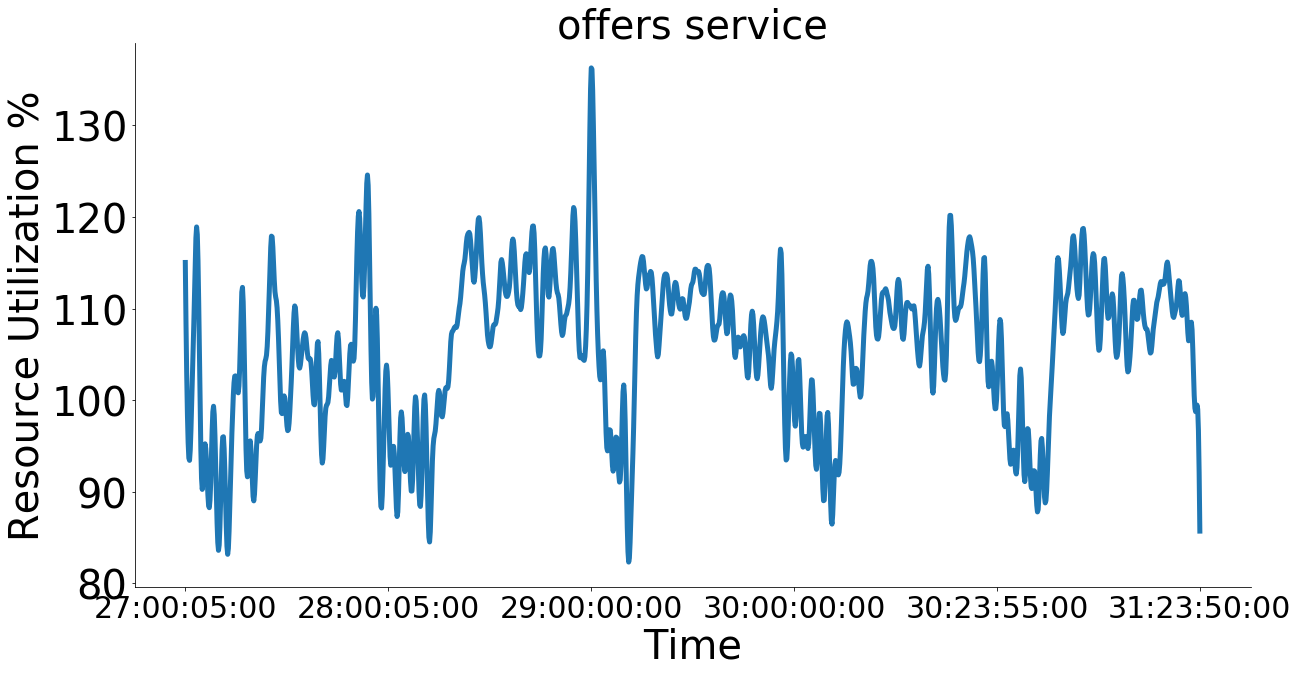

safereceiver-prod-6cf1ccb315.cont-1---9e16d406659a891dc50cfd6189216d26cf46e985----b2bfef.cf55a453-5e79-11e8-a239-421db0942d0d.csv


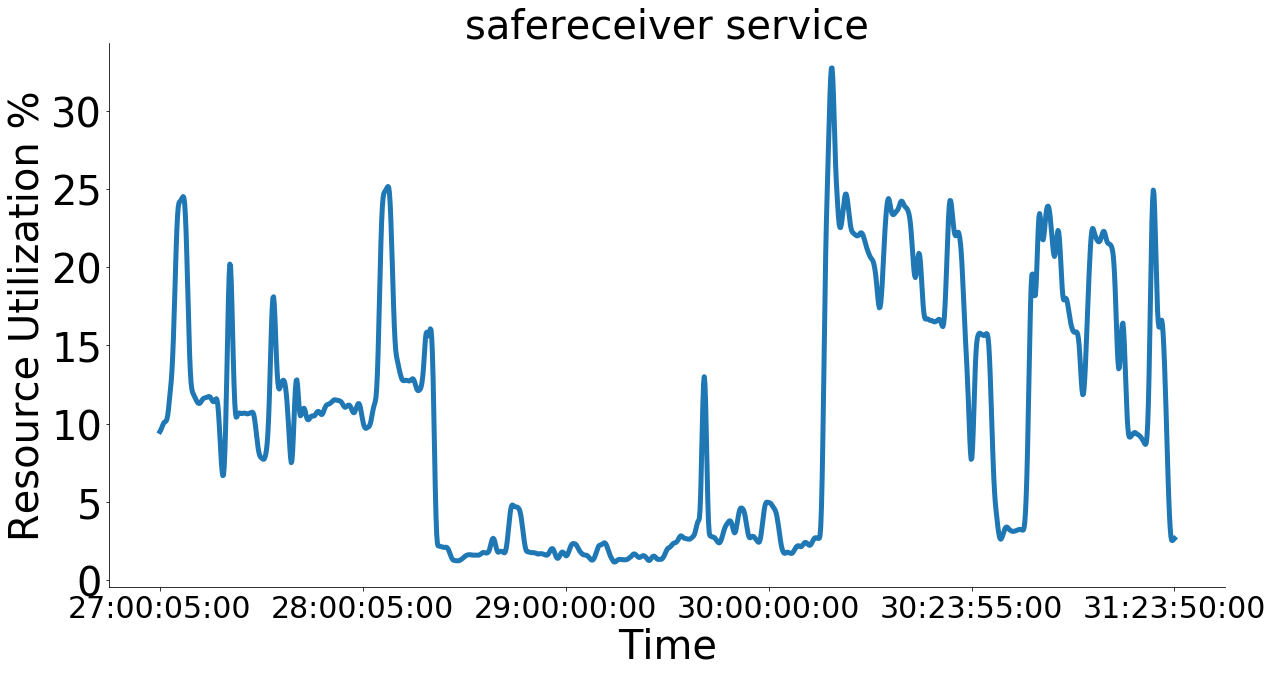

scidxsvc-production-36a1ff80c9.scidx---44f76356a831cc5b857e35363ca55b45bcb98a9c----44ed60.edbf821c-5fff-11e8-bcd1-8633960b35b2.csv


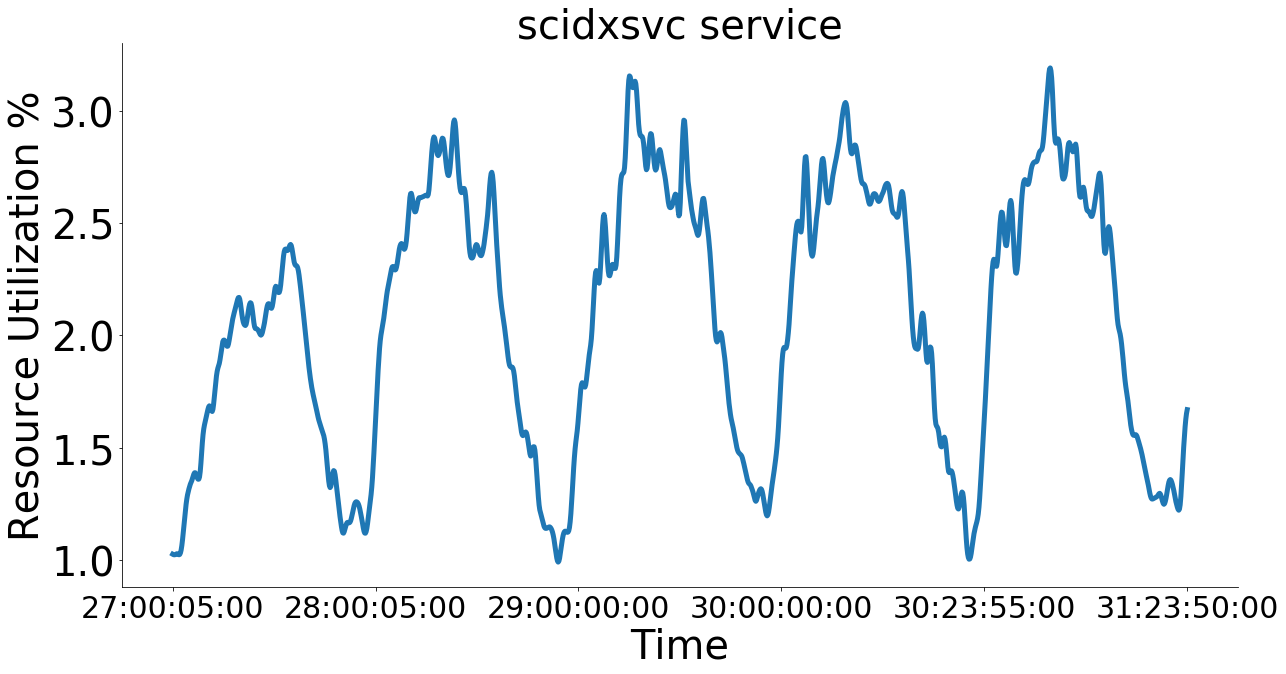

sellableitems-prod-fa8b019fbf.sis---2f7d392b9bc7dcd2d78f7de7a6ae249ec50a3a99----cf0e87.cf1c321f-6003-11e8-9920-b2e98c367baf.csv


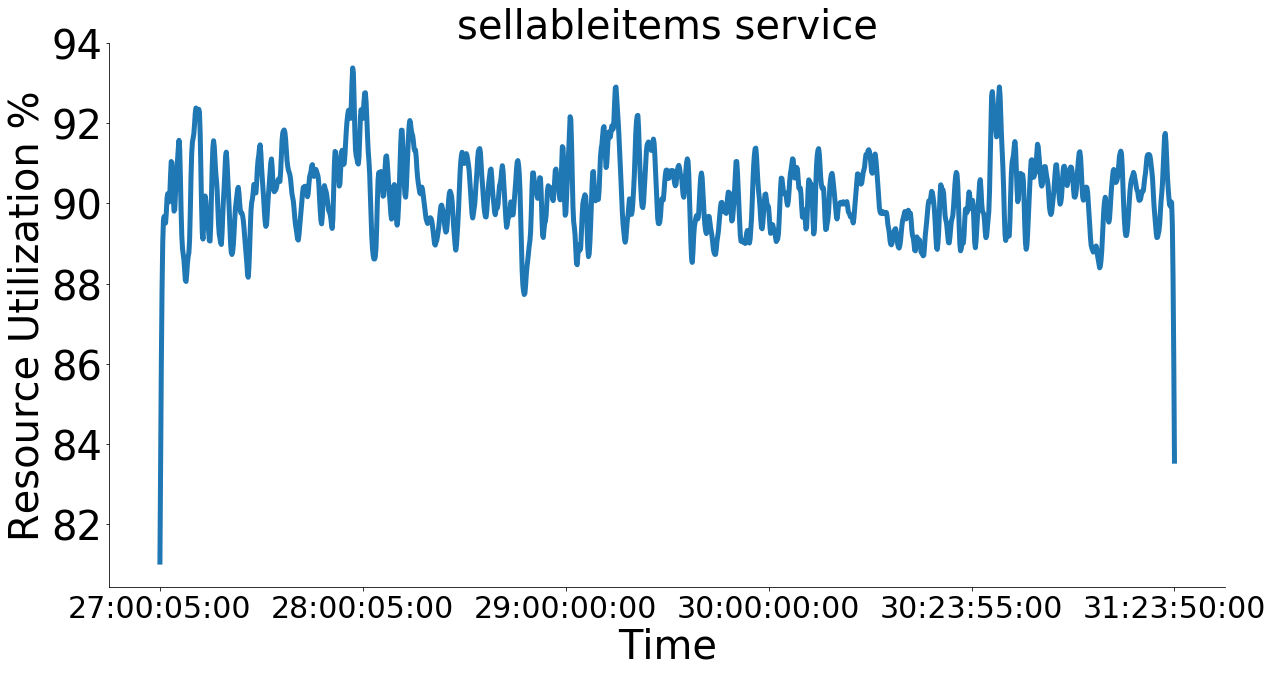

senseifeaturefacedescriptor-prod-e2f33acc40.container1---ba824b21a645594c9a3ffd7f6bb070796ae6606b----5fc626.6ed1662a-605a-11e8-a239-421db0942d0d.csv


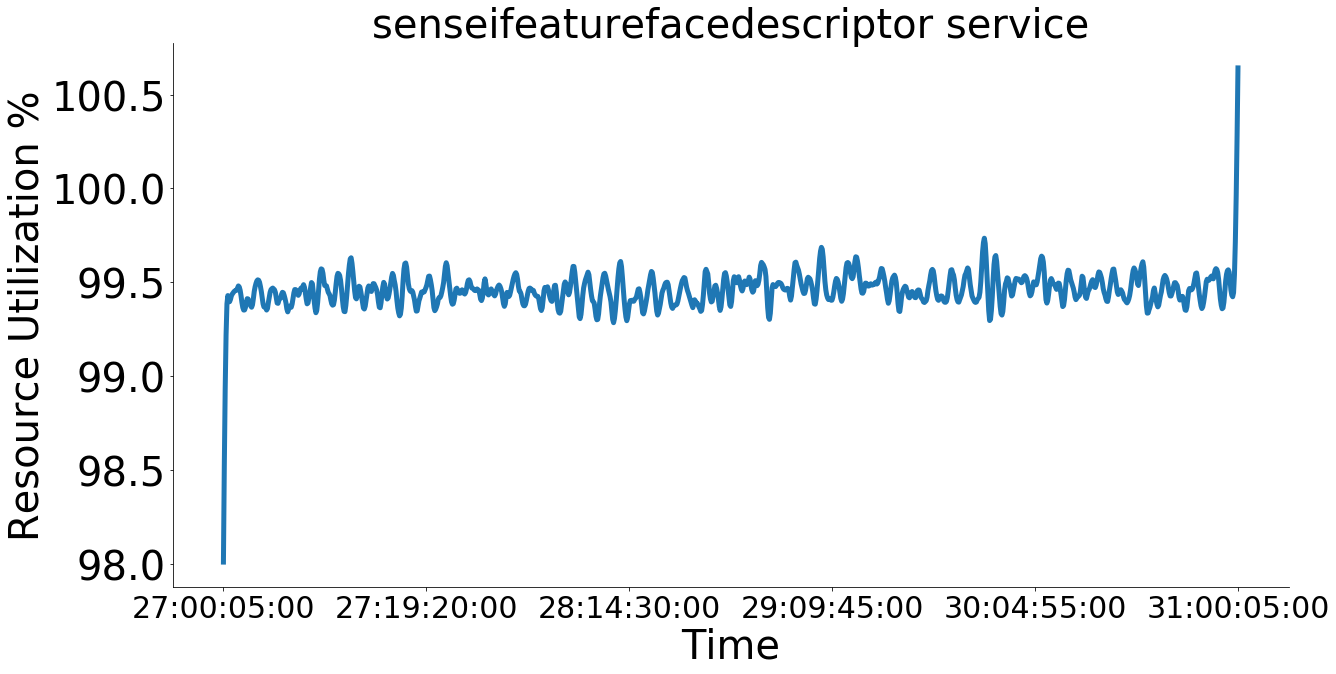

stkidxs-production-ab8617b0fc.idxsvc---7674e02e84c2224801630052b778740cc95f6255----669be1.9ac496e0-625f-11e8-bc2f-3a4f9d122ee5.csv


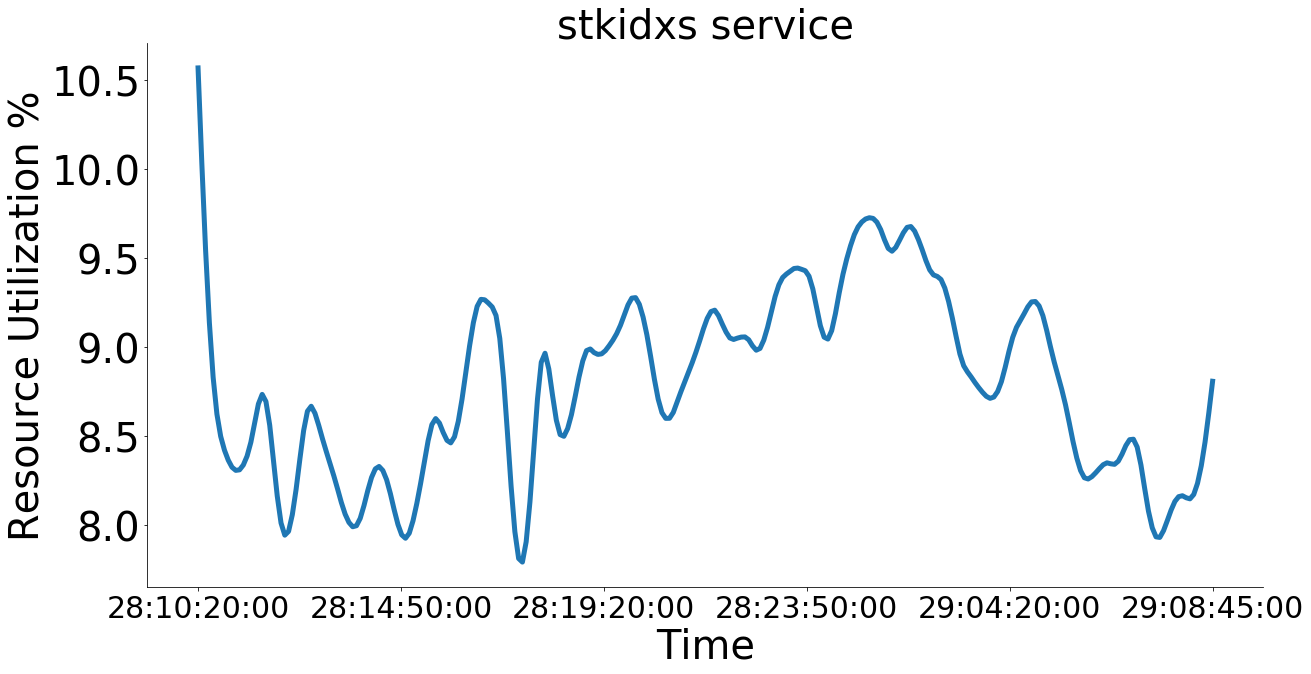

storybackupworker-production-75848d087d.storybackupworker---32b03c6bfe841b4d5d3c95858c1efc608f047092----0f7339.ae4bfa9d-5dec-11e8-8cc3-8230a943a1c1.csv


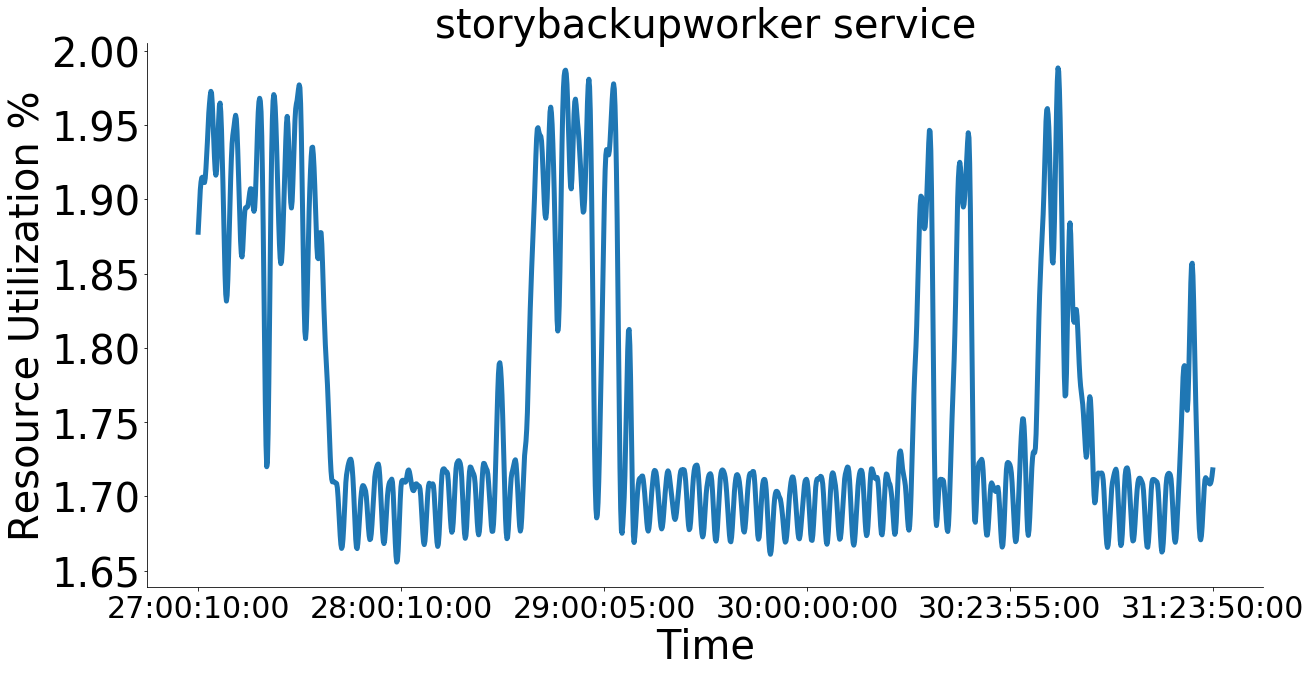

tps-prod-2d4e5b3fe2.tps---66893b06de7a86adcc1972ffa5bad5168ca15a6c----332e03.ec12717f-6028-11e8-a239-421db0942d0d.csv


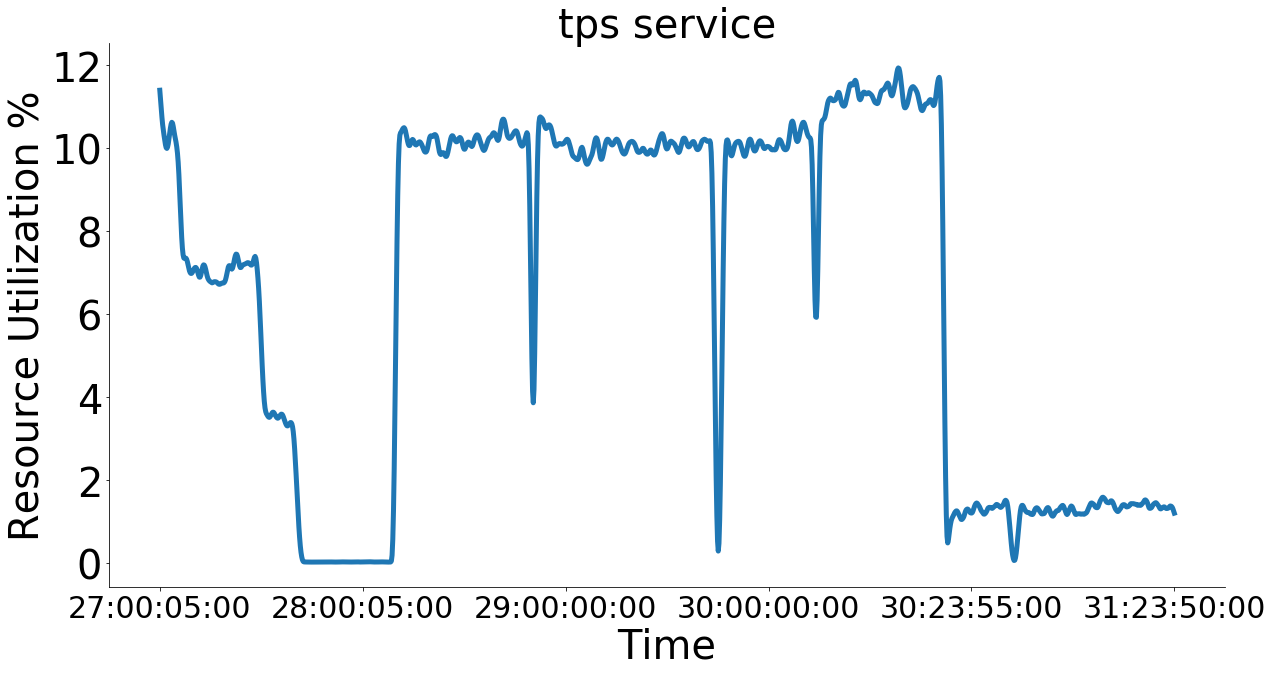

tslogger-prod-028e645d88.tslogger---18849bccfeaf3c135ceeed354e0096f0ba44625c----5ce564.f9f3de78-5e7a-11e8-a239-421db0942d0d.csv


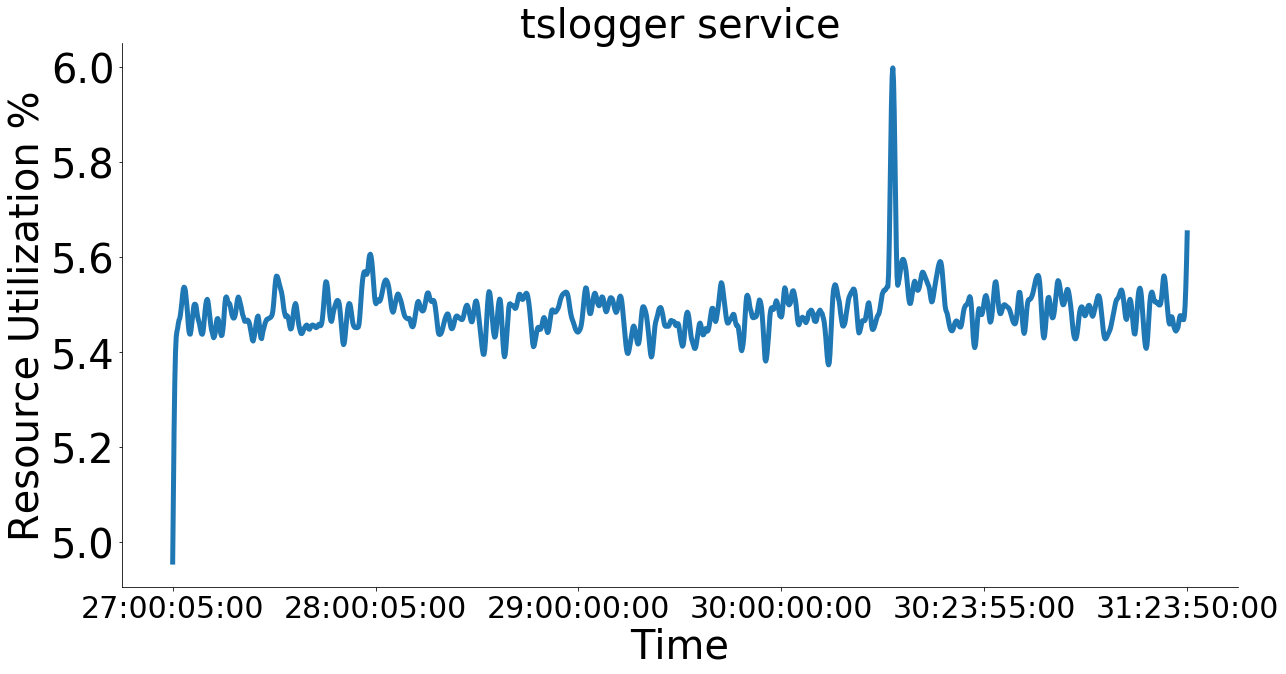

uss-prod-105178c1ac.uss---ba6c765721ca698182164c3cee9a8e474fe93de3----b997c2.b9a9878a-5f44-11e8-a9cd-ea97a4c792c6.csv


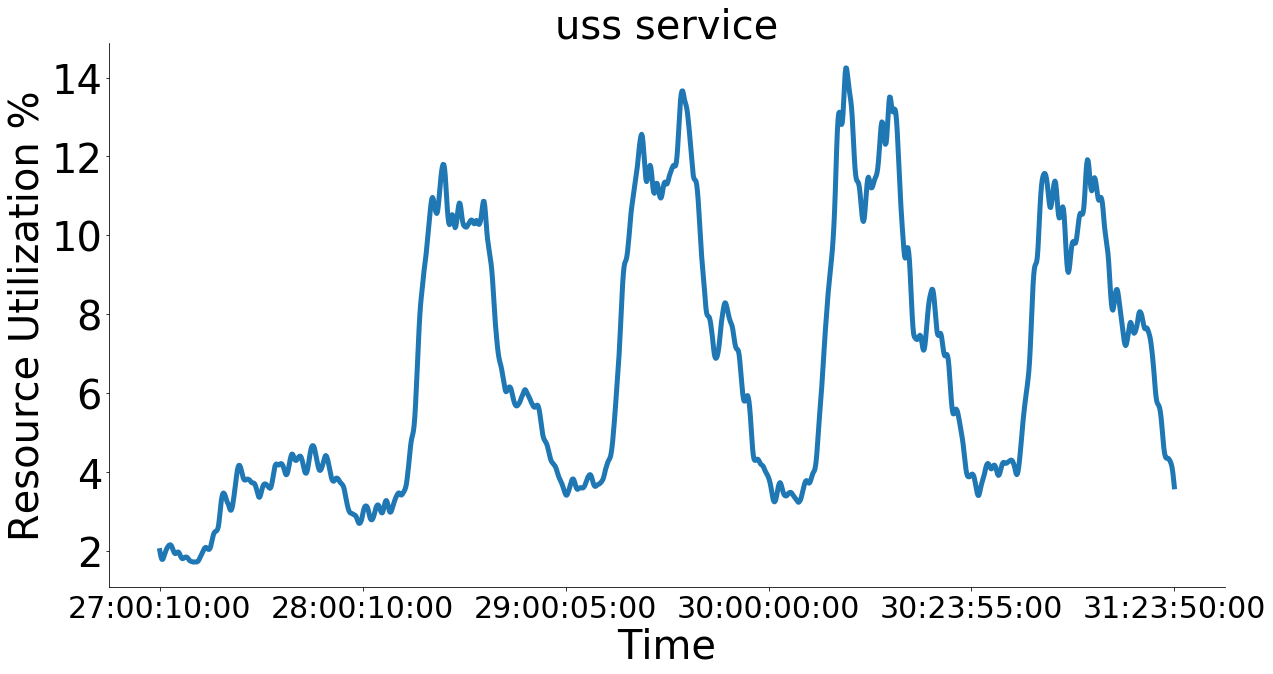

In [17]:
import  pandas as pd
import numpy as np
import os
for c in sorted(os.listdir('/home/ubuntu/plots_smooth_long')):
    print(c)
    t=pd.read_csv('/home/ubuntu/plots_smooth_long/'+c)
    import datetime
    x=[]
    for p in range(t.shape[0]):
    
    # convert unix timestamp to datetime format
        x.append(datetime.datetime.fromtimestamp(
            t['node_timestamp'][p]
        ).strftime('%Y-%m-%d %H:%M:%S'))
    
    t['date']=x
    # extract hour and day from datetime format
    t['hour'] =  pd.to_datetime(t['date'], format='%Y%m%d %H:%M:%S.%f').dt.hour
    t['day'] =  pd.to_datetime(t['date'], format='%Y%m%d %H:%M:%S.%f').dt.day
    
    
    xi=[]
    for m in range(t.shape[0]):
        xi.append(str(t['day'][m])+':'+t['date'][m][-8:])
    t['day_hour']=xi # day_hour_min_secs format
    %matplotlib inline
  
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,10))
   
    ax = plt.subplot()


# Hide the right and top axis
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
   

   
    
    ax.plot(t['node_timestamp'],t['utilization'],linewidth=5)
    
    plt.xticks(np.arange(t['node_timestamp'].min(),t['node_timestamp'].max()+1,(t['node_timestamp'].max()-t['node_timestamp'].min())/5))
    idx=[]
    y=np.arange(t['node_timestamp'].min(),t['node_timestamp'].max()+1,(t['node_timestamp'].max()-t['node_timestamp'].min())/5)
    for l in list(y):
    
        idx.append(t.index[t['node_timestamp'] >=int(l)].tolist()[0])
    plt.xticks(list(np.arange(t['node_timestamp'].min(),t['node_timestamp'].max()+1,(t['node_timestamp'].max()-t['node_timestamp'].min())/5)),
                    t['day_hour'][idx].values.tolist())  # Set locations and labels
    plt.title(c.split('-')[0]+' service',fontsize=40)
    plt.xlabel('Time',fontsize=40)
    plt.ylabel('Resource Utilization %',fontsize=40)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=40)
  

    plt.show()
    

activitylogreceiver-prod-0bacf0ebf9.activitylogreceiver---51040c45e1a519ee176c8daa9e77ba6378a944e0----72b845.6b9a88cd-5e7e-11e8-9273-2e60ad6fcb96.csv


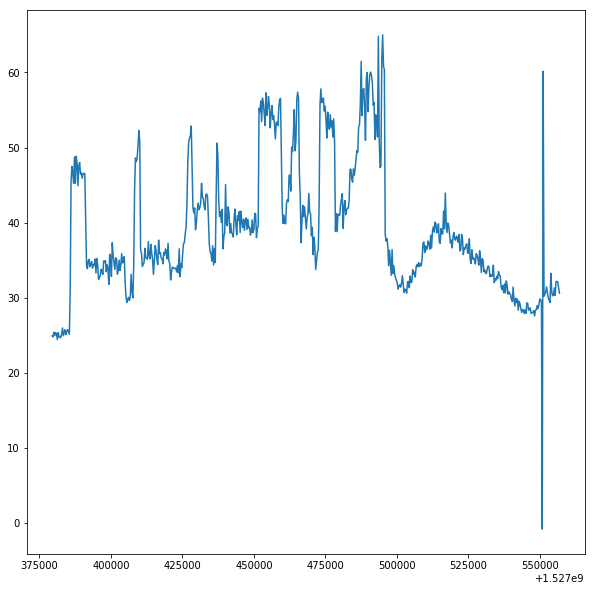

apex-production-eee88bd80a.apex---aefe9bffeb8365b6f4b47cc20c05e461923b4533----a1696b.aa710579-5fab-11e8-a63a-fe7cf23cbef0.csv


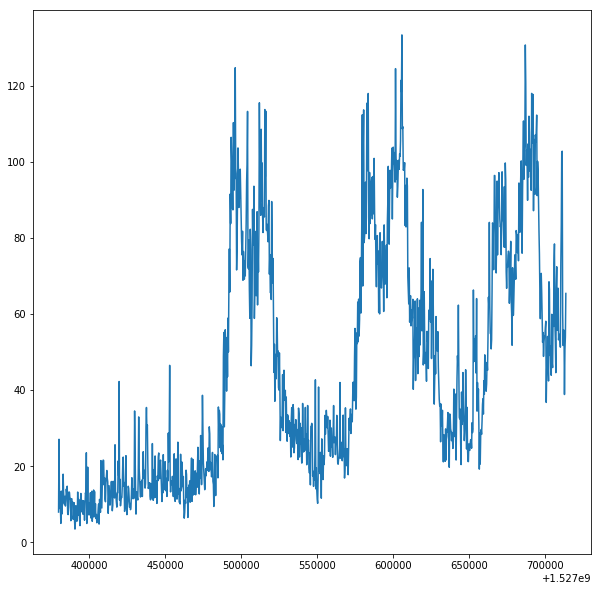

cclibraries-production-67331e1323.cclibraries---7a22d4f921336cd843b6909ac9681f5d6b5c93c8----0d9837.b00a1986-5f34-11e8-a9cd-ea97a4c792c6.csv


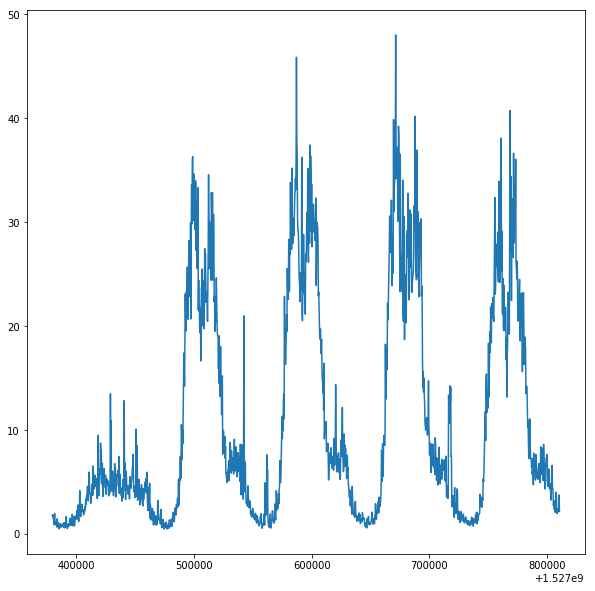

cupmat-production-632b434acd.cupmat---931670a3f56dd67ba46af758608cc03585b8c9f0----3c2f81.9cb3c26b-60ba-11e8-a239-421db0942d0d.csv


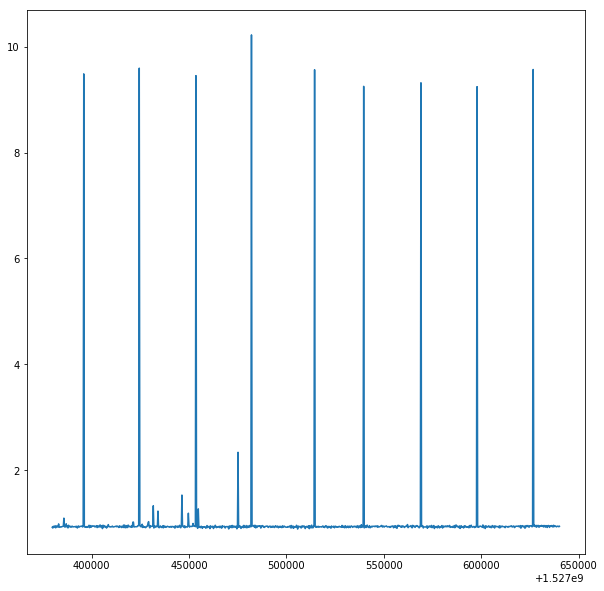

ddeventcnsumer-prod-2c92c18601.epcont---e9a3f6ca587854051425819a91474be758bf5ad1----a594f5.e6d4e9be-620d-11e8-a239-421db0942d0d.csv


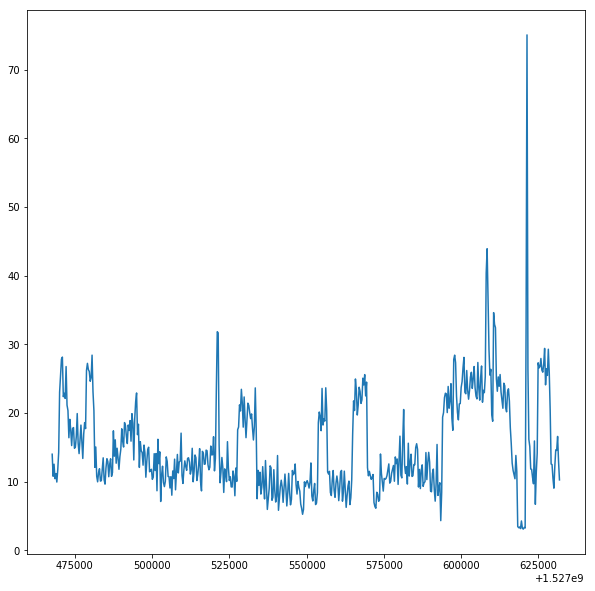

enterorgservice-prod-6f99c19a45.enterorgservice---fc8848840b0bf301e00e071677a22b0b8e67aa29----2c8de7.f6d67e62-5f4e-11e8-a239-421db0942d0d.csv


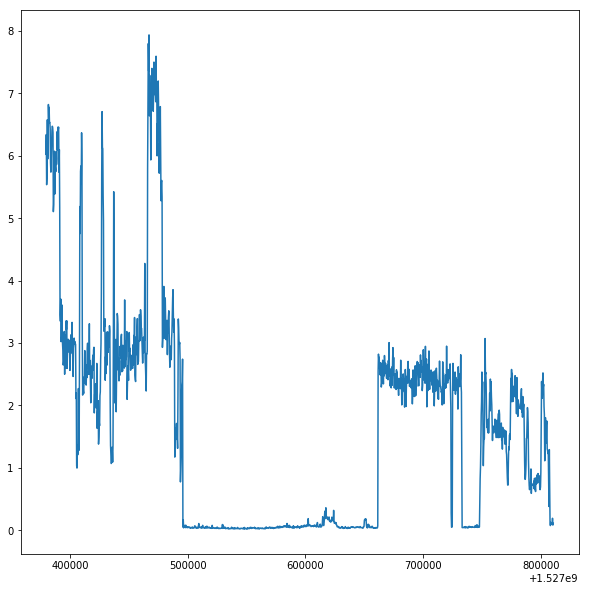

ethoscanarytest2-prod-a32ce355c7.canarys---91b70c15c1ecc5378e0cb869199c0d59604a0e2f----4f061b.4f1aa5a8-6070-11e8-8d26-f61af398a948.csv


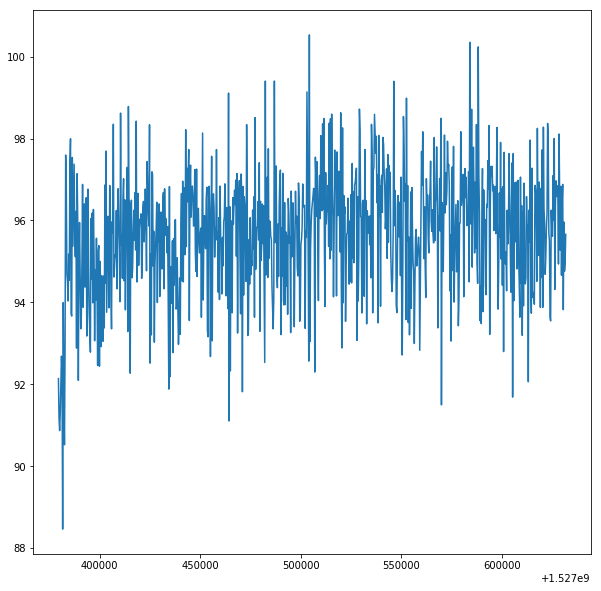

lridxsvc-production-94333b4209.lridx---207a8ec7f8378dd28d301c08e511a910e04da7ce----18c0d6.39f62255-5fa3-11e8-a239-421db0942d0d.csv


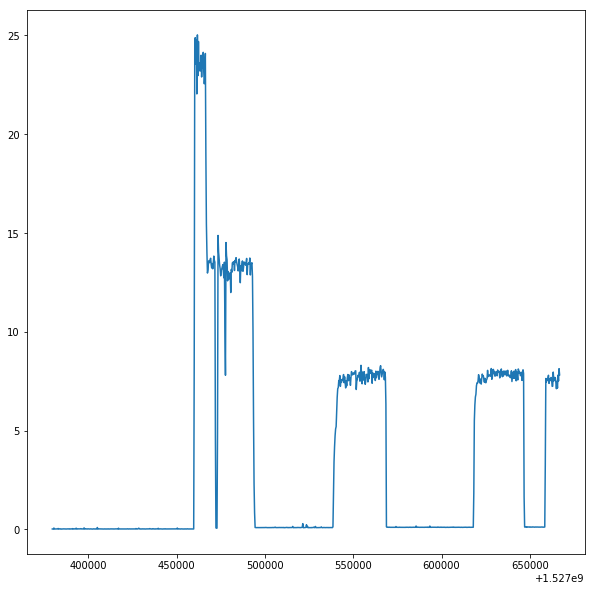

offers-prod-374f8f1744.offers---cb3b2578e23aaaff3a95c460b56468108f0228a9----138385.142ab1f5-6007-11e8-9920-b2e98c367baf.csv


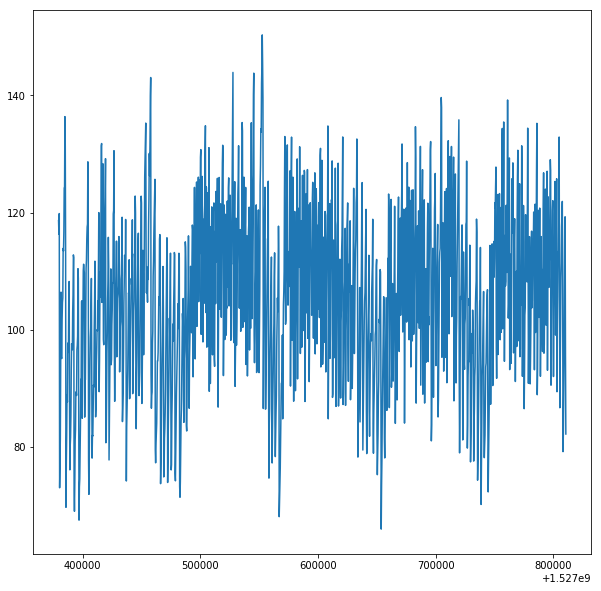

safereceiver-prod-6cf1ccb315.cont-1---9e16d406659a891dc50cfd6189216d26cf46e985----b2bfef.cf55a453-5e79-11e8-a239-421db0942d0d.csv


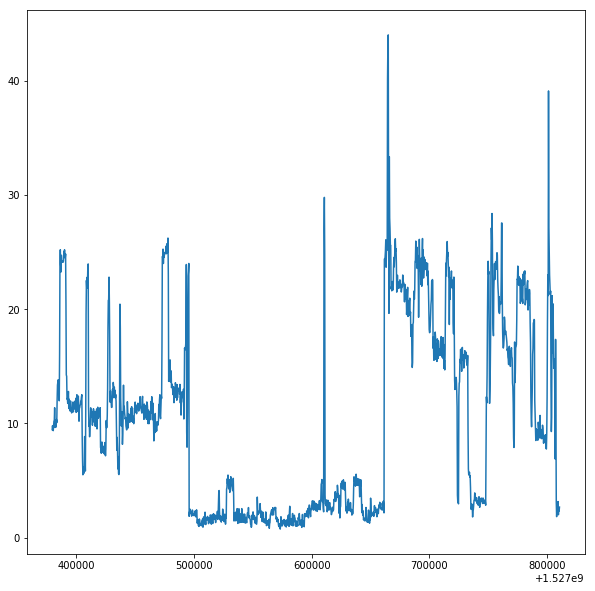

scidxsvc-production-36a1ff80c9.scidx---44f76356a831cc5b857e35363ca55b45bcb98a9c----44ed60.edbf821c-5fff-11e8-bcd1-8633960b35b2.csv


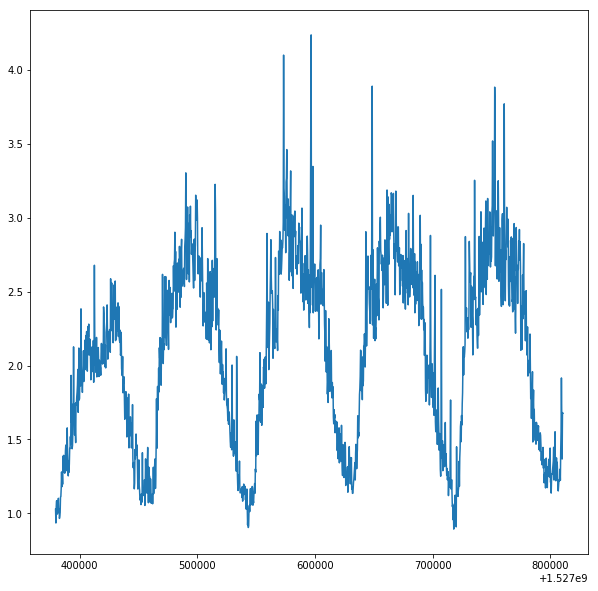

sellableitems-prod-fa8b019fbf.sis---2f7d392b9bc7dcd2d78f7de7a6ae249ec50a3a99----cf0e87.cf1c321f-6003-11e8-9920-b2e98c367baf.csv


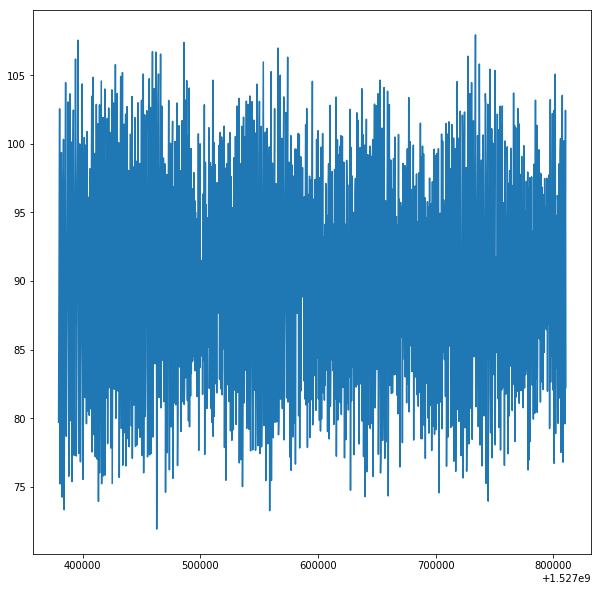

senseifeaturefacedescriptor-prod-e2f33acc40.container1---ba824b21a645594c9a3ffd7f6bb070796ae6606b----5fc626.6ed1662a-605a-11e8-a239-421db0942d0d.csv


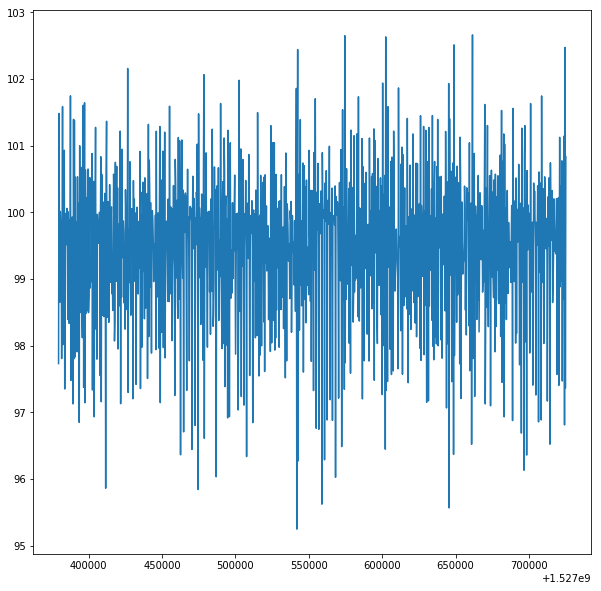

stkidxs-production-ab8617b0fc.idxsvc---7674e02e84c2224801630052b778740cc95f6255----669be1.9ac496e0-625f-11e8-bc2f-3a4f9d122ee5.csv


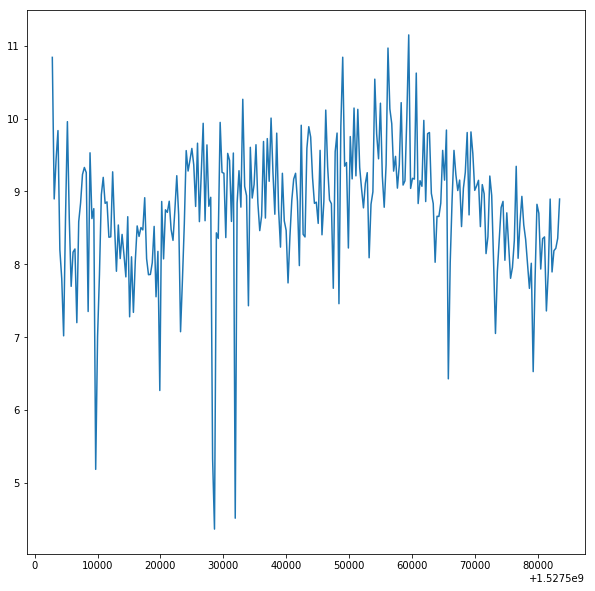

storybackupworker-production-75848d087d.storybackupworker---32b03c6bfe841b4d5d3c95858c1efc608f047092----0f7339.ae4bfa9d-5dec-11e8-8cc3-8230a943a1c1.csv


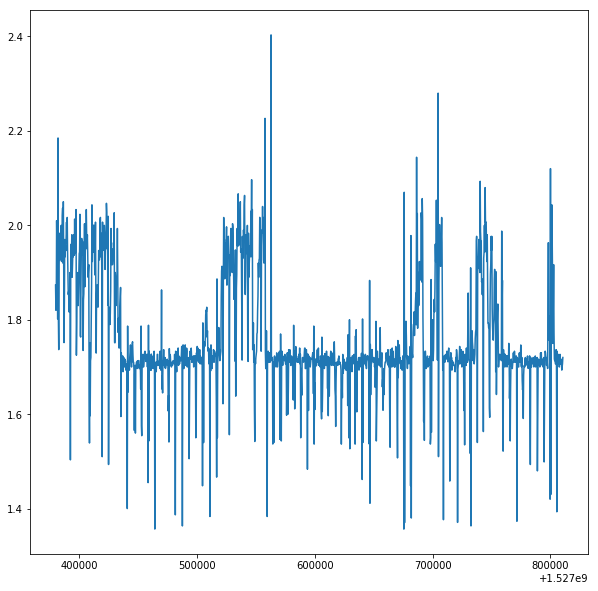

tps-prod-2d4e5b3fe2.tps---66893b06de7a86adcc1972ffa5bad5168ca15a6c----332e03.ec12717f-6028-11e8-a239-421db0942d0d.csv


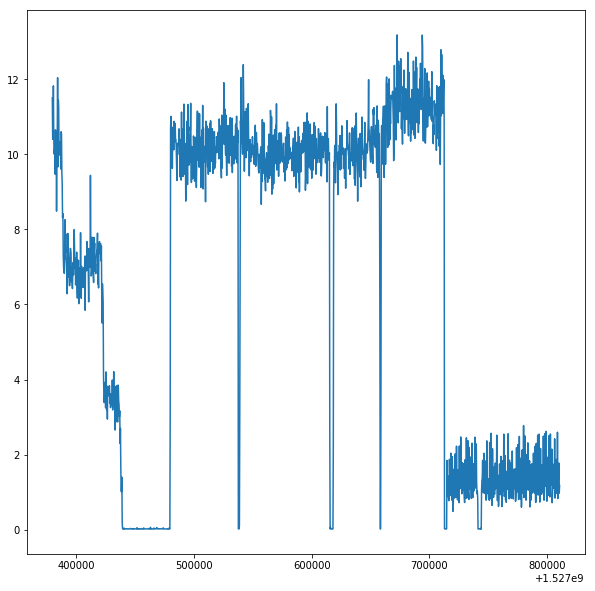

tslogger-prod-028e645d88.tslogger---18849bccfeaf3c135ceeed354e0096f0ba44625c----5ce564.f9f3de78-5e7a-11e8-a239-421db0942d0d.csv


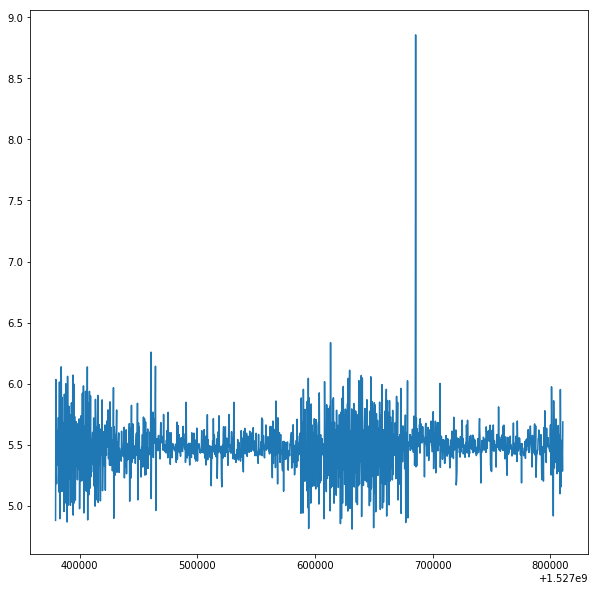

uss-prod-105178c1ac.uss---ba6c765721ca698182164c3cee9a8e474fe93de3----b997c2.b9a9878a-5f44-11e8-a9cd-ea97a4c792c6.csv


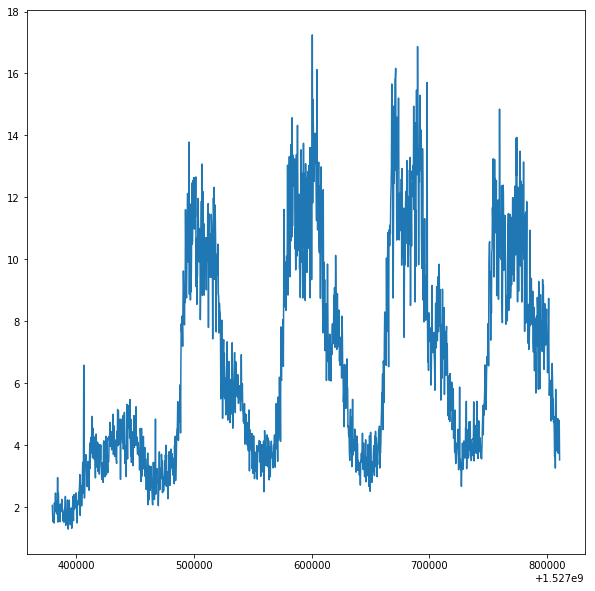

In [1]:
# unsmoothed long plots
import  pandas as pd
import os
for c in sorted(os.listdir('/home/ubuntu/plots_long')):
    print(c)
    t=pd.read_csv('/home/ubuntu/plots_long/'+c)
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    plt.plot(t['node_timestamp'],t['utilization'])
    plt.show()
    
    

In [ ]:


c='/home/ubuntu/plots_smooth_less/uss-prod-105178c1ac.uss---ba6c765721ca698182164c3cee9a8e474fe93de3----b997c2.b9a9878a-5f44-11e8-a9cd-ea97a4c792c6.csv'
d='/home/ubuntu/plots_smooth_less/cclibraries-production-67331e1323.cclibraries---7a22d4f921336cd843b6909ac9681f5d6b5c93c8----0d9837.b00a1986-5f34-11e8-a9cd-ea97a4c792c6.csv'
t=pd.read_csv(c)
t1=pd.read_csv(d)
import datetime
x=[]
for p in range(t.shape[0]):


    x.append(datetime.datetime.fromtimestamp(
        t['node_timestamp'][p]
    ).strftime('%Y-%m-%d %H:%M:%S'))

t['date']=x

t['hour'] =  pd.to_datetime(t['date'], format='%Y%m%d %H:%M:%S.%f').dt.hour
t['day'] =  pd.to_datetime(t['date'], format='%Y%m%d %H:%M:%S.%f').dt.day
xi=[]
for m in range(t.shape[0]):
    xi.append(str(t['day'][m])+':'+t['date'][m][-8:])
t['day_hour']=xi
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

#####
x=[]
for p in range(t1.shape[0]):


    x.append(datetime.datetime.fromtimestamp(
        t['node_timestamp'][p]
    ).strftime('%Y-%m-%d %H:%M:%S'))

t1['date']=x

t1['hour'] =  pd.to_datetime(t['date'], format='%Y%m%d %H:%M:%S.%f').dt.hour
t1['day'] =  pd.to_datetime(t['date'], format='%Y%m%d %H:%M:%S.%f').dt.day
xi=[]
for m in range(t1.shape[0]):
    xi.append(str(t1['day'][m])+':'+t1['date'][m][-8:])
t1['day_hour']=xi
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))



plt.plot(t['node_timestamp'][0:650],1.8*t['utilization'][0:650],'r',label='uss-prod',linewidth=5)
plt.plot(t1['node_timestamp'][0:650],t1['utilization'][0:650],'b',label='cclibraries',linewidth=5)


plt.xticks(np.arange(t['node_timestamp'].min(),t['node_timestamp'].max()+1,(t['node_timestamp'].max()-t['node_timestamp'].min())/5))
idx=[]
y=np.arange(t['node_timestamp'].min(),t['node_timestamp'].max()+1,(t['node_timestamp'].max()-t['node_timestamp'].min())/5)
for l in list(y):

    idx.append(t.index[t['node_timestamp'] >=int(l)].tolist()[0])
plt.xticks(list(np.arange(t['node_timestamp'].min(),t['node_timestamp'].max()+1,(t['node_timestamp'].max()-t['node_timestamp'].min())/5)),
                t['day_hour'][idx].values.tolist(),fontsize=20)  # Set locations and labels
plt.title('Plot of Uss-Prod and cclibraries',fontsize=50)
plt.xlabel('Time',fontsize=50)
plt.ylabel('Resource Utilization %',fontsize=40)
plt.yticks(fontsize=40)
plt.legend(fontsize=40)

#    plt.xticks()
plt.show()


# END OF NOTEBOOK

In [12]:
import re

In [13]:
regex = re.compile('\w+-\w+-\w{10}')

In [16]:
regex.findall('asd-asd-1234567890')

['asd-asd-1234567890']

In [17]:
z = {}
for  s in df['mesos_task_service'].unique():
    if regex.findall(s):
           z[s.split('-')[0]] = 2
    elif 'envoy' in s:
        z['envoy'] = 1
    elif 'etcd' in s:
        z['etcd'] = 1
    else:
        z[s] = 1


NameError: name 'df' is not defined

In [ ]:
z.keys()

In [ ]:
for name in z.keys():
    if z[name] == 1:
        print (name) 

In [ ]:
for name in z.keys():
    if z[name] == 2:
        print (name) 

In [ ]:
lKey = [key for key, value in z.iteritems() if value == 1][0]

In [ ]:
z.keys(1)

In [ ]:
list(z.values())

In [ ]:
import randomatacollectionservice-prod-cf37950ad3.csv
random.sample(list(z.values()),40)

In [ ]:
df['mesos_task_service'].unique()

In [ ]:
df['mesos_task_id'].unique().shape

In [ ]:
df['mesos_node_id'].unique().shape

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df = spark.read.csv("./data/2018/05/25/0.csv",header=True);

In [ ]:
df

In [ ]:
df.show(5000)

In [ ]:
df = sqlContext.read.load('./data/2018/05/25/0.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [ ]:
df.count()

In [ ]:
import pandas as pd
series=pd.read_csv('ethos_time_series.csv')
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(series.iloc[0,3:])
plt.show()


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./27_reduced.csv')

In [58]:
df27 = spark.read.csv('./27_reduced.csv', header=True)

In [59]:
from pyspark.sql.functions import regexp_extract
df271 = df27.withColumn('d', regexp_extract('mesos_task_id', '(massweb).*', 1))#.toDF('d')
df272 = df271.filter(df271.d != '').collect()

In [60]:
df272

[Row(mesos_task_id='massweb-production-aad169f864.app-server-1---0b0f08e0def888d45d0a98fe72040a7cc7be2000----413713.7bac6f36-5e46-11e8-a63a-fe7cf23cbef0', mesos_task_total_cpu_time='495.95001220703125', mesos_task_cpu_limit='0.5000000238418579', mesos_node_id='a1779048-5d1a-400e-8a38-6e950723ada2-S37', mesos_node_timestamp='1.527379091E9', mesos_node_cpu_utilization='0.36666666136847603', d='massweb'),
 Row(mesos_task_id='massweb-production-aad169f864.app-server-1---0b0f08e0def888d45d0a98fe72040a7cc7be2000----413713.7bac9647-5e46-11e8-a63a-fe7cf23cbef0', mesos_task_total_cpu_time='499.72998809814453', mesos_task_cpu_limit='0.5000000238418579', mesos_node_id='a1779048-5d1a-400e-8a38-6e950723ada2-S40', mesos_node_timestamp='1.527379091E9', mesos_node_cpu_utilization='0.5722222328186035', d='massweb'),
 Row(mesos_task_id='massweb-production-aad169f864.app-server-1---0b0f08e0def888d45d0a98fe72040a7cc7be2000----413713.7bac9647-5e46-11e8-a63a-fe7cf23cbef0', mesos_task_total_cpu_time='499.729

In [63]:
df271 = df27.withColumn('d', regexp_extract('mesos_task_id', '(subscriptiondefservice).*', 1))#.toDF('d')
df271.filter(df271.d != '').collect()

[Row(mesos_task_id='senseicore-prod-cfbb56251b.cc-cont1---35f349ceddfa19aca767768a222ff85c18dbbc67----1761ac.1787cdad-607b-11e8-bcd1-8633960b35b2', mesos_task_total_cpu_time='117.47000122070312', mesos_task_cpu_limit='1.9999999046325683', mesos_node_id='bcddbc27-c50a-4ae2-bdba-4496189b6d61-S26', mesos_node_timestamp='1.527379014E9', mesos_node_cpu_utilization='0.1444444391462538', d='senseicore'),
 Row(mesos_task_id='senseicore-prod-cfbb56251b.cc-cont1---35f349ceddfa19aca767768a222ff85c18dbbc67----1761ac.17877f8c-607b-11e8-bcd1-8633960b35b2', mesos_task_total_cpu_time='120.68000030517578', mesos_task_cpu_limit='1.9999999046325683', mesos_node_id='bcddbc27-c50a-4ae2-bdba-4496189b6d61-S59', mesos_node_timestamp='1.527379014E9', mesos_node_cpu_utilization='0.36666666136847603', d='senseicore'),
 Row(mesos_task_id='senseicore-prod-cfbb56251b.cc-cont1---35f349ceddfa19aca767768a222ff85c18dbbc67----1761ac.17877f8c-607b-11e8-bcd1-8633960b35b2', mesos_task_total_cpu_time='120.68000030517578', m

In [16]:
x['mesos_task_id'].filter(regex='^abmtest.*', axis=0)

Series([], Name: mesos_task_id, dtype: object)

In [23]:
y = spark.createDataFrame([('100-200',)], ['str'])

In [13]:
x

mesos_task_id    start_time
0     abmtest-prod-7a584bbabf.abmtest---e8d0ae1169ea...  1.527379e+09
1     abmtest-prod-7a584bbabf.abmtest---e8d0ae1169ea...  1.527379e+09
2     acmp-production-2d82b00354.acmp---7329a8d940f4...  1.527379e+09
3     acmp-production-2d82b00354.acmp---7329a8d940f4...  1.527379e+09
4     acmp-production-2d82b00354.acmp---7329a8d940f4...  1.527502e+09
5     acmp-production-2d82b00354.acmp---920728e30f30...  1.527511e+09
6     acmp-production-2d82b00354.acmp---920728e30f30...  1.527511e+09
7     acmp-production-2d82b00354.acmp---e1696ff4b678...  1.527627e+09
8     acmp-production-2d82b00354.acmp---e1696ff4b678...  1.527627e+09
9     acmp-production-d8e4b6efee.acmp---7329a8d940f4...  1.527379e+09
10    acmp-production-d8e4b6efee.acmp---7329a8d940f4...  1.527379e+09
11    acmp-production-d8e4b6efee.acmp---920728e30f30...  1.527511e+09
12    acmp-production-d8e4b6efee.acmp---920728e30f30...  1.527511e+09
13    acmp-production-d8e4b6efee.acmp---e1696ff4b678...  1.527627e+09
14    acmp-production-d8e4b6efee.acmp---e1696ff4b678...  1.527627e+09
15    acmp-production-e743c6fce3.acmp---7329a8d940f4...  1.527379e+09
16    acmp-production-e743c6fce3.acmp---7329a8d940f4...  1.527379e+09
17    acmp-production-e743c6fce3.acmp---920728e30f30...  1.527511e+09
18    acmp-production-e743c6fce3.acmp---920728e30f30...  1.527511e+09
19    acmp-production-e743c6fce3.acmp---e1696ff4b678...  1.527627e+09
20    acmp-production-e743c6fce3.acmp---e1696ff4b678...  1.527627e+09
21    activitylogconsumer-prod-fd12043401.activityco...  1.527379e+09
22    activitylogconsumer-prod-fd12043401.activityco...  1.527379e+09
23    activitylogconsumer-prod-fd12043401.activityco...  1.527379e+09
24    activitylogreceiver-prod-0bacf0ebf9.activitylo...  1.527379e+09
25    activitylogreceiver-prod-0bacf0ebf9.activitylo...  1.527379e+09
26    activitylogreceiver-prod-0bacf0ebf9.activitylo...  1.527379e+09
27    activitylogreceiver-prod-0bacf0ebf9.activitylo...  1.527557e+09
28    activitylogreceiver-prod-0bacf0ebf9.activitylo...  1.527557e+09
29    activitylogreceiver-prod-0bacf0ebf9.activitylo...  1.527459e+09
...                                                 ...           ...
4003  workflow-prod-b7f8dfe6ae.workflow---0ebe07ee0b...  1.527379e+09
4004  workflow-prod-b7f8dfe6ae.workflow---0ebe07ee0b...  1.527379e+09
4005  workflow-prod-b7f8dfe6ae.workflow---2022c90e68...  1.527502e+09
4006  workflow-prod-b7f8dfe6ae.workflow---2022c90e68...  1.527502e+09
4007  workflow-prod-b7f8dfe6ae.workflow---98fa348a94...  1.527602e+09
4008  workflow-prod-b7f8dfe6ae.workflow---98fa348a94...  1.527602e+09
4009  xdweb-prod-16b5612e74.xdweb-cont---36f7e325244...  1.527593e+09
4010  xdweb-prod-16b5612e74.xdweb-cont---36f7e325244...  1.527593e+09
4011  xdweb-prod-16b5612e74.xdweb-cont---73b0802c243...  1.527614e+09
4012  xdweb-prod-16b5612e74.xdweb-cont---73b0802c243...  1.527614e+09
4013  xdweb-prod-16b5612e74.xdweb-cont---8dd71f74c74...  1.527384e+09
4014  xdweb-prod-16b5612e74.xdweb-cont---8dd71f74c74...  1.527384e+09
4015  xdweb-prod-16b5612e74.xdweb-cont---f9c29193ec9...  1.527379e+09
4016  xdweb-prod-16b5612e74.xdweb-cont---f9c29193ec9...  1.527379e+09
4017  xdweb-prod-206e6d04f0.xdweb-cont---36f7e325244...  1.527593e+09
4018  xdweb-prod-206e6d04f0.xdweb-cont---36f7e325244...  1.527593e+09
4019  xdweb-prod-206e6d04f0.xdweb-cont---73b0802c243...  1.527614e+09
4020  xdweb-prod-206e6d04f0.xdweb-cont---73b0802c243...  1.527614e+09
4021  xdweb-prod-206e6d04f0.xdweb-cont---8dd71f74c74...  1.527383e+09
4022  xdweb-prod-206e6d04f0.xdweb-cont---8dd71f74c74...  1.527383e+09
4023  xdweb-prod-206e6d04f0.xdweb-cont---f9c29193ec9...  1.527379e+09
4024  xdweb-prod-206e6d04f0.xdweb-cont---f9c29193ec9...  1.527379e+09
4025  xdweb-prod-f33de83e13.xdweb-cont---36f7e325244...  1.527593e+09
4026  xdweb-prod-f33de83e13.xdweb-cont---36f7e325244...  1.527593e+09
4027  xdweb-prod-f33de83e13.xdweb-cont---73b0802c243...  1.527614e+09
4028  xdweb-prod-f33de83e13.xdweb-cont---73b0802c243

In [6]:
df

mesos_task_id  \
0          profileapi-production-2053c9481b.profileapi---...   
1          tpia-prod-8f9d4ccb6a.tpia---cbca4d972516639a11...   
2          dooplo-prod-064f9c1650.dooplo---6f0b96e2e00424...   
3          scia-prod1-f335721a9c.scia---41e9bdd34308a6148...   
4          dooplo-prod-064f9c1650.dooplo---6f0b96e2e00424...   
5          safeloader-prod-74574c2851.cont-1---b7ffb99eac...   
6          runtime-production-75e021e5cc.runtime---89e1b2...   
7          creativetapservice-production-405387a90a.creat...   
8          quotaservice-production-55c3bfa146.quotaservic...   
9          tpia-prod-8f9d4ccb6a.tpia-us-va5---cbca4d97251...   
10         collabworker-production-4604bc5ab1.collabworke...   
11         ethossynthetictestservice-production2-76274a44...   
12         tpia-prod-8f9d4ccb6a.tpia-hk---cbca4d972516639...   
13         collabworker-production-4604bc5ab1.collabworke...   
14         tracemanager-production-be786305c5.tracemanage...   
15         assetshelper-production-054f0333d6.assetshelpe...   
16         scia-prod1-f335721a9c.scia---41e9bdd34308a6148...   
17         uaminvokerservice-preprod-5d969b783e.uam-invok...   
18         billinginstrumentsservice-prod-606067b3b1.bill...   
19         safeloader-prod-74574c2851.cont-1---b7ffb99eac...   
20         billinginstrumentsservice-prod-606067b3b1.bill...   
21         ethosha-production2-e1990b23d6.canary---e84de1...   
22         profileapi-production-2053c9481b.profileapi---...   
23         policy-production-f1eb971a1d.policy---ad927b3c...   
24         scia-prod1-f335721a9c.scia---41e9bdd34308a6148...   
25         scea-production-b909a18ba9.scea---7efea2c2f818...   
26         skoll-production-88c86d0e62.skoll---c95b526eb0...   
27         quotaservice-production-55c3bfa146.quotaservic...   
28         uamworkerservice-preprod-4d46dfb5e5.uam-worker...   
29         safeloader-prod-74574c2851.cont-1---b7ffb99eac...   
...                                                      ...   
143966025  mdsjobservice-production-33856c3e78.mds-jobser...   
143966026  recentsearch-production-f65ed1e9ee.recentsearc...   
143966027  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966028  aposms-prod-86e4538d23.aposms---a8d5f83ddbb6db...   
143966029  datacollectionservice-prod-c200889aa3.datacoll...   
143966030  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966031  robs-prod-474a9fdd4d.robs---191e2dd56f2a61a89e...   
143966032  asr4523-production1-338316ad33.asr4523---700de...   
143966033  canary2-production03-e5f1a1b459.canary---afa50...   
143966034  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966035  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966036  datacollectionservice-prod-c200889aa3.datacoll...   
143966037  datacollectionservice-prod-c200889aa3.datacoll...   
143966038  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966039  onboardingservice-prod-e69930491e.onboardingse...   
143966040  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966041  cops-prod-3121f51ef8.cops---3895162010d58eb52a...   
143966042  dcwebserver-production-61265bb756.dcwebserver-...   
143966043  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966044  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966045  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966046  loggingserver-production-0e8280d7cc.loggingser...   
143966047  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966048  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966049  blether-production-68f99c5fb1.blether---606df4...   
143966050  dciorchestrationworker-production-f4edeeb67d.d...   
143966051  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966052  logeventconsumer-prod-93e25af4be.logeventconsu...   
143966053  dciorchestrationworker-production-f4edeeb67d.d...   
143966054  mdscassandraworker-production-960d531f6e.mds-c...   

           mesos_task_total_cpu_time  mesos_task_cpu_limit  \
0               